# **Lab 3: Clustering**

**Group 2 Members:**
Reagan Meagher, Jaclyn Coate, Megan Riley, and Matthew Chinchilla

**Kaggle Link To Data:** [Cenus Data](https://www.kaggle.com/muonneutrino/us-census-demographic-data)

**Clustering and Discretization Notebook:** [Clustering and Discretization Python Notebook](https://github.com/jakemdrew/DataMiningNotebooks/blob/master/09.%20Clustering%20and%20Discretization.ipynb)

**Clustering Validity Notebook:** [Clustering Validity Python Notebook](https://github.com/jakemdrew/DataMiningNotebooks/blob/master/10.%20Clustering%20Validity.ipynb)

**Advanced Clustering Notebook:** [Advanced Clustering Python Notebook](https://github.com/jakemdrew/DataMiningNotebooks/blob/master/09.%20Clustering%20and%20Discretization.ipynb)


## **1. Business Understanding**

The data we used for this lab is a 2015 United States census data set for the all 50 states at the census tract level, accessed via Kaggle. This data set contains demographic data about each census tract such as ethnicity, job function, commute types, poverty, income, and unemployment. We also have the 2017 version of this data set. 

This data set was orignally collected by the United States Census Bureau to gain insights into the demographics of areas of the U.S. on a granular level. 

For us, the purpose of this data set is to determine which characteristics of a geographical area determine the level of poverty in that respective area.Specifically in this report we are looking at which clustered features will help determine the level of poverty in that respective area. Poverty in this data set is given as a percentage of the population, but in order for this to be a classification we turned that percentage into a factor with four levels: Low Poverty, Average Poverty, High Poverty, and Extreme Poverty. We will discuss this new dependent variable in detail in the new features section. 

We will have successfully mined useful knowledge from this data set if we can determine which feature subset representing charactersitics of a geographical area that we performed cluster analysis on are the most highly correlated with certain poverty classes. Using these new clustered feature subsets, this will help lead us to building better classification models than in previous labs that can accruately predict which poverty class that geographical area is. 

Our classification models will be built with clustered feature subsets and original variables from our data set at the census tract level.

The poverty level of an area is very important as it has social, cultural, political, and economic implications. Therefore, we need to know for sure if an area is at a certain poverty level. We also need to know that if we change certain characteristics of a geographical area if that would likely change the poverty level or not. That leads us to thinking that the accuracy of our model, that being the rate of correct poverty class predictions, is highly important if we are to label our model as an effective model to predict poverty class of a geographical area. 

Therefore, we will focus on the accuracy metric as a determintent of a successfull classification model or not. An 80%-90% accuracy level would suffice as an effective classifcation model. 

We are not concerend with sensitivity and specificity as both would mean a wrong classification of the geographical area. Depending on the use of the model in certain industries and sectors a wrong poverty class classification could infinite impacts such as employement prospects, government funding, school budgets, and community services. For example, if this model were to be used by a company looking to open an office in a certain area a wrong poverty class classification of that area could cause them to not open, leading to lost employment prospects in that area.

## **2. Data Understanding**

### **2.1 Data Understanding 1: Data Meaning/Type & Data Quality**

In this section we explore and describe the meaning and type of data for each attributes in our data set. We also verify the quality of our data by looking at and dealing with any missing values, duplicate data, and outliers.

#### **2.1.1 Data Read In & Set Up**

First we read in our raw data set from our Github Repository.

In [40]:
#Load Python Packages
import pandas as pd
import numpy as np

#Envirornment Set Up Options
pd.set_option('display.max_columns', 500)
pd.options.display.float_format = '{:.2f}'.format

#Load 2015 Census Data Set
census2015 = "https://raw.githubusercontent.com/megnn/SMUMSDS_ML1/master/acs2015_census_tract_data.csv"
data2015 = pd.read_csv(census2015)

Just as we have done in previous labs we created our class variable, *PovertyClass* off of the continuous poverty percentage variables in our original data set. We created four different poverty classes: Low Poverty, Below Average Poverty, Above Average Poverty, and High Poverty. The bin thresholds used to create these four classes are the quartiles of the *Poverty* percentage variable. 

Based on these thresholds:

    Low Poverty is between 0 and  7.2%

    Below Average Poverty is between 7.2 and 13.4%

    Above Average Poverty is between 13.4 and 23.1%

    High Poverty is between 23.1 and 100%

Some of our pre-processing methods for scaling inlcuded evaluating how our variables were being presented and whether they are displayed in percentage or aggregate numerical form. Since, the majority of our variables represent percentages of a population from 0 to 100%, that fit a certain category, we want as many variables to be displayed this way. We have two variables: *Citizen* and *Employed* that are not percentages, but rather aggregate counts of a population. Therefore, we created percentage variables for these two attributes called *CitizenPercent* and *EmployedPercent*. 

In [41]:
#Create class variable: Poverty Class
PovertyClass = pd.cut(data2015.Poverty,bins=[0,data2015['Poverty'].quantile(.25),data2015['Poverty'].quantile(.50),data2015['Poverty'].quantile(.75),100],labels=
[1,2,3,4])
data2015.insert(37,'PovertyClass',PovertyClass)

#New feature creation: Citizen Percent
CitizenPercent = ''
data2015.insert(16, 'CitizenPercent', CitizenPercent)
data2015['CitizenPercent'] = round((data2015['Citizen']/data2015['TotalPop'])*100,1)

#New feature creation: Employed Percent
EmployedPercent = ''
data2015.insert(37, 'EmployedPercent', CitizenPercent)
data2015['EmployedPercent'] = round((data2015['Employed']/data2015['TotalPop'])*100,1)

#### **2.1.2 Data Meaning/Type**


The data we are using is from a Kaggle dataset containing U.S. Census Demographic Data. The author describes the data as being from the DP03 and DP05 tables of the 2015 and 2017 American Community Survey 5-year estimates. We have both the 2015 and 2017 datasets at the census tract level of detail. The census bureau defines a census tract as an area roughly equivalent to a neighborhood containing around 5000 residents. We created several new variables for this data set such as PovertyClass, IncomeClass, PopulationClass, and population percentage breakdowns of men and women. These variables were created to provide us with a categorical dependent variable, additional predictors for our model and to aid in our analysis of the data. The complete data set includes 43 variables and 74001 rows with the majority of the variables being percentages classified as float64 variables.
The table below contains data definitions, most definitions regarding race or ethnicity were sourced from the original census brief overview. Other data definitions were obtained from the Census bureau glossary. Below the data definitions table is addition information related to the variables.


| Attribute          | Description                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         |
| :-----------------| :-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| CensusTract     | The Census Tract Id as assigned by the US Census Bureau                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             |
| State           | The State the data comes from                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       |
| County          | The county the data comes from                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      |
| TotalPop        | The total Population in a tract or county                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           |
| Men             | The total population of men in a given tract or county                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              |
| Women           | The total population of women in a given tract or county                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            |
| PrcMen          | Percentage of men in a tract                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        |
| PrcWomen        | Percentage of Women in a tract                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      |
| Hispanic        | Percentage of population in a given tract or county that Identifies as Hispanic.  A hispanic is defined as a person of Cuban, Mexican, Puerto Rican, South or  Central American, or other Spanish culture or origin regardless of race.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             |
| White           | Percentage of population in a given tract or county that identifies as white.  “White” refers to a person having origins in any of the original peoples of Europe,  the Middle East, or North Africa. It includes people who indicated their race(s) as  “White” or reported entries such as Irish, German, Italian, Lebanese,Arab, Moroccan,  or Caucasian.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        |
| Black           | Percentage of population in a given tract or county that identifies as black.“Black or African American”  refers to a person having origins in any of the Black racial groups of Africa. It includes people who  indicated their race(s) as “Black, African Am., or Negro” or reported entries such as African American,  Kenyan, Nigerian, or Haitian.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             |
| Native          | Percentage of population in a given tract or county that identifies as native. “American Indian or  Alaska Native” refers to a person having origins in any of the original peoples of North and South America  (including Central America) and who maintains tribal affiliation or community attachment. This category  includes people who indicated their race(s) as “American Indian or Alaska Native” or reported their enrolled  or principal tribe, such as Navajo, Blackfeet, Inupiat, Yup’ik, or Central American Indian groups or South  American Indian groups.                                                                                                                                                                                                                                                                                                                          |
| Asian           | Percentage of population in a given tract or county that identifies as Asian.“Asian” refers to a person having origins in any of the original peoples of the Far East, Southeast Asia, or the Indian subcontinent, including, for example, Cambodia, China, India, Japan, Korea, Malaysia, Pakistan, the Philippine Islands, Thailand, and Vietnam. It includes people who indicated their race(s) as “Asian” or reported entries such as “Asian Indian,” “Chinese,” “Filipino,” “Korean,” “Japanese,” “Vietnamese,” and “Other Asian” or provided other detailed Asian responses.                                                                                                                                                                                                                                                                                                                  |
| Pacific         | Percentage of population in a given tract or county that identifies as Pacific.“Native Hawaiian or Other Pacific Islander” refers to a person having origins in any of the original peoples of Hawaii, Guam, Samoa, or other Pacific Islands. It includes people who indicated their race(s) as “Pacific Islander” or reported entries such as “Native Hawaiian,” “Guamanian or Chamorro,” “Samoan,” and “Other Pacific Islander” or provided other detailed Pacific Islander responses.                                                                                                                                                                                                                                                                                                                                                                                                            |
| Other           | Percentage of population in a given tract or county that does not fit into the classes of Hispanic, White, Black, Native, Asian, or Pacific. This variable was created to account for other races not explicitly called out in the original data.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   |
| Citizen         | Number of total population in a tract or county that are United States citizens.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    |
| Income          | Estimated household income in a given tract or county.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              |
| IncomeErr       | Income standard error.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              |
| IncomePerCap    | Per capita income is the mean income computed for every man, woman, and child in a particular group. It is derived by dividing the total income of a particular group by the total population.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      |
| IncomePerCapErr | Income Per Capita standard error.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   |
| Poverty         | Percentage of total population considered in poverty. The Census Bureau uses a set of money income thresholds that vary by family size and composition to determine who is in poverty. If the total income for a family or unrelated individual falls below the relevant poverty threshold, then the family (and every individual in it) or unrelated individual is considered in poverty.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          |
| ChildPoverty    | Percentage of total population considered children and in poverty.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  |
| Professional    | Percentage of total population who's occupation is considered professional. The Professional, Scientific, and Technical Services sector comprises establishments that specialize in performing professional, scientific, and technical activities for others. These activities require a high degree of expertise and training. Activities performed include: legal advice and representation; accounting, bookkeeping, and payroll services; architectural, engineering, and specialized design services; computer services; consulting services; research services; advertising services; photographic services; translation and interpretation services; veterinary services; and other professional, scientific, and technical services.                                                                                                                                                        |
| Service         | Percentage of total population who's occupation is considered part of the service or hospitality industry. The Accommodation and Food Services sector is comprised of establishments providing customers with lodging and/or preparing meals, snacks, and beverages for immediate consumption. The sector includes both accommodation and food services establishments because the two activities are often combined at the same establishment.                                                                                                                                                                                                                                                                                                                                                                                                                                                     |
| Office          | Percentage of total population who's occupation is considered administrative or office oriented.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    |
| Construction    | Percentage of total population who's occupation is considered to be part of the construction sector. The Construction sector comprises establishments primarily engaged in the construction of buildings or engineering projects (e.g., highways and utility systems). Construction work done may include new work, additions, alterations, or maintenance and repairs.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             |
| Production      | Percentage of total population who's occupation is considered to be part of the production sector. The “production workers” number includes workers (up through the line-supervisor level) engaged in fabricating, processing, assembling, inspecting, receiving, storing, handling, packing, warehousing, shipping (but not delivering), maintenance, repair, janitorial and guard services, product development, auxiliary production for plant’s own use (e.g., power plant), recordkeeping, and other services closely associated with these production operations at the establishment covered by the report. Employees above the working-supervisor level are excluded from this item.                                                                                                                                                                                                        |
| Drive           | Percentage of total population who's primary mode of transportation is driving.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     |
| Carpool         | Percentage of total population who's primary mode of transportation is carpool.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     |
| Transit         | Percentage of total population who's primary mode of transportation is the public transit system.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   |
| Walk            | Percentage of total population who's primary mode of transportation is walking.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     |
| OtherTransp     | Percentage of total population who's primary mode of transportation is other than driving, carpooling, public transit, or walking.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  |
| WorkAtHome      | Percentage of total population who work at or from their place of residence.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        |
| MeanCommute     | The average commute distance in miles for persons that are employed but not working at or from their place of residence.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            |
| Employed        | Total number of population who are considered employed. Employed includes all civilians 16 years old and over who were either (1) "at work" -- those who did any work at all during the reference week as paid employees, worked in their own business or profession, worked on their own farm, or worked 15 hours or more as unpaid workers on a family farm or in a family business; or (2) were "with a job but not at work" -- those who did not work during the reference week but had jobs or businesses from which they were temporarily absent due to illness, bad weather, industrial dispute, vacation, or other personal reasons. Excluded from the employed are people whose only activity consisted of work around the house or unpaid volunteer work for religious, charitable, and similar organizations; also excluded are people on active duty in the United States Armed Forces. |
| PrivateWork     | Percentage of total population that work for a private company or structures not owned by any federal, state, or local government.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  |
| PublicWork      | Percentage of total population that work for a federal, state, or local government.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 |
| SelfEmployed    | Percentage of total population that are self employed.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              |
| FamilyWork      | Percentage of total population that work with or for immediate or extended family.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  |
| Unemployment    | Percentage of total population that is considered unemployed. All civilians 16 years old and over are classified as unemployed if they (1) were neither "at work" nor "with a job but not at work" during the reference week, and (2) were actively looking for work during the last 4 weeks, and (3) were available to accept a job.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               |
| IncomeClass    | Classification of poverty based on income per capita. 'Lower Class' = 0-19189, 'Lower-Middle Class' = 19190-25367, 'Upper-Middle Class' = 25369-33889, 'Upper Class' = 33890-1000000                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                |
| PopulationClass | A classifier indicating the size of the population. 'Small Population' = 0-2944, 'Medium Population' = 2945-4098, 'large Population' = 4099-5467, 'Extra Large Population' = 5486 - 100000                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          |
| PovertyClass    | A classifier indicating the class of poverty in a given tract. The classifier was calculated based on the percent of poverty indicated for each tract 'Low Poverty' = 0 to 6.9%, 'Average Poverty' = 7 to 12.4%,'High Poverty' = 12.5 to 21.9%, 'Extreme Poverty' = 22 to 100%                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      |

In [4]:
data2015.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74001 entries, 0 to 74000
Data columns (total 40 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   CensusTract      74001 non-null  int64   
 1   State            74001 non-null  object  
 2   County           74001 non-null  object  
 3   TotalPop         74001 non-null  int64   
 4   Men              74001 non-null  int64   
 5   Women            74001 non-null  int64   
 6   Hispanic         73311 non-null  float64 
 7   White            73311 non-null  float64 
 8   Black            73311 non-null  float64 
 9   Native           73311 non-null  float64 
 10  Asian            73311 non-null  float64 
 11  Pacific          73311 non-null  float64 
 12  Citizen          74001 non-null  int64   
 13  Income           72901 non-null  float64 
 14  IncomeErr        72901 non-null  float64 
 15  IncomePerCap     73261 non-null  float64 
 16  CitizenPercent   73311 non-null  float64

#### **2.1.3 Data Quality**

**Missing Values**

From the below output we can see there were between about six hundred to about twelve hundred NA values found in most of the columns. Overall there were about 1500 instances with some values of NAs, as shown in the breakdown by column a lot of these had multiple NA values and spread across multiple attributes, this resulted in several columns with several hundred values missing.
Rather than imputation, given some instances had many NAs, we chose to remove them from the dataset. As seen in the code chunks below this only removed less than two percent of the original data leaving us with a varied and robust sample size to continue exploration and eventual model building. Overall no particular geographical area was removed at a disproportionate rate.




In [5]:
#Checking for NAs
data2015.isnull().sum()

CensusTract           0
State                 0
County                0
TotalPop              0
Men                   0
Women                 0
Hispanic            690
White               690
Black               690
Native              690
Asian               690
Pacific             690
Citizen               0
Income             1100
IncomeErr          1100
IncomePerCap        740
CitizenPercent      690
IncomePerCapErr     740
Poverty             835
ChildPoverty       1118
Professional        807
Service             807
Office              807
Construction        807
Production          807
Drive               797
Carpool             797
Transit             797
Walk                797
OtherTransp         797
WorkAtHome          797
MeanCommute         949
Employed              0
PrivateWork         807
PublicWork          807
SelfEmployed        807
FamilyWork          807
EmployedPercent     690
Unemployment        802
PovertyClass        998
dtype: int64

In [42]:
#NA remove and check
data2015original = data2015.copy()
data2015 = data2015.dropna()
data2015.isnull().sum()

data2015.isnull().sum()

perc = 72671/74001
print("Original Records: 74001")
print("Remaining Records: 72671")
print("Remaining Percentage: ", round((perc*100),2), "%")
print("")
data2015.isnull().sum()

Original Records: 74001
Remaining Records: 72671
Remaining Percentage:  98.2 %



CensusTract        0
State              0
County             0
TotalPop           0
Men                0
Women              0
Hispanic           0
White              0
Black              0
Native             0
Asian              0
Pacific            0
Citizen            0
Income             0
IncomeErr          0
IncomePerCap       0
CitizenPercent     0
IncomePerCapErr    0
Poverty            0
ChildPoverty       0
Professional       0
Service            0
Office             0
Construction       0
Production         0
Drive              0
Carpool            0
Transit            0
Walk               0
OtherTransp        0
WorkAtHome         0
MeanCommute        0
Employed           0
PrivateWork        0
PublicWork         0
SelfEmployed       0
FamilyWork         0
EmployedPercent    0
Unemployment       0
PovertyClass       0
dtype: int64

**Duplicate Data Analysis**

Our data set did not contain any duplicate records as each census tract occurs once and represents a specific geographical area of the United States. There may be census tract with some shared underlying features, but that is expected. 

In [7]:
#Duplicates
print("Number of Duplicate Census Tracts Recorded:", data2015.duplicated(subset = "CensusTract").sum())

Number of Duplicate Census Tracts Recorded: 0


**Outliers Analysis**

Overall any columns with total population counts demonstrate major skew, as shown in the boxplots outlined in the visualizations section. 

Most descriptive variables in this data set were on the scale of percentages. Due to that scale, even some instances of outliers will have minimal effect on the spread of data. 


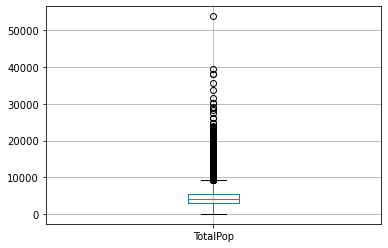

In [8]:
#Outliers
#Total Population
data2015.boxplot(column = "TotalPop")

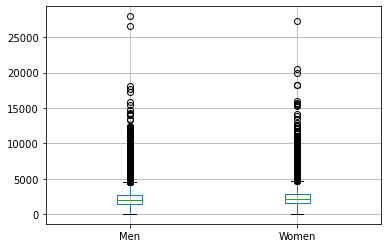

In [9]:
#Men and Women are both total counts and will skew like total population
#Men and Women Columns
data2015.boxplot(column = ["Men","Women"])

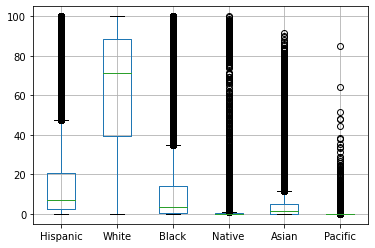

In [10]:
#Racial Column Comparsions
data2015.boxplot(column = ["Hispanic","White","Black","Native","Asian","Pacific"])


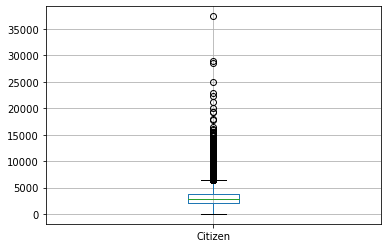

In [11]:
#Citizen Column
#Perct Citizen of Total Pop may be a better function of this. 
data2015.boxplot("Citizen")

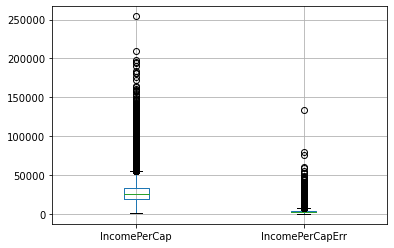

In [12]:
#Incomes per cap
#Reflects per person incomes
data2015.boxplot(["IncomePerCap", "IncomePerCapErr"])

**Removing Unnessecary and Redundant Variables**

Now we remove variables that are deemed unnecessary for analysis. We removed the Poverty variable because it was built off of our new class variable PovertyClass.
A group of variables removed are the aggregated numerical variables TotalPop, Citizen, Men, Women, and Employed. The Men and Women variables were removed because we are not including sex in our analysis. The TotalPop variable was removed because we want our model to classify based on the percentage makeup of the geographical area, irrespective of size. The Citizen and Employed variables were removed because they are represented in our newly created variables CitizenPercent and EmployedPercent, respectively.
Another group of variables removed were the income variables. There are four income variables in our data set: Income, IncomeErr, IncomePerCap and IncomePerCapErr. These are all highly correlated variables to each other and depict the same information in different ways. Therefore, since we do not want duplicate data, we only want to use one for our model. Therefore, we took out Income, IncomeErr, and *IncomePerCapErr, leaving just IncomePerCap in our data set for model building. The IncomePerCap variable depicts the mean income computed for every man, woman, and child in a particular group. It is derived by dividing the total income of a particular group by the total population.
The last group of variables we removed were the geographically identifying variables. We removed any geographically identifying variables from our data set so that our models would not train on location. This allows our model to be potentially run on any geographical area regardless of size and location to predict the Poverty Class in that area. The specific geographically identifying variables we removed are CensusTract, County, and State.



In [43]:
#Remove variables that are not needed/useful for analysis.
#Remove aggregate numerical population count variables
source_data2015 = data2015.copy()

del data2015['Poverty']
del data2015['TotalPop']
del data2015['Citizen']
del data2015['Men']
del data2015['Women']
del data2015['Employed']

#Remove income varaibles since we are using just IncomePerCap
del data2015['Income']
del data2015['IncomeErr']
del data2015['IncomePerCapErr']

#Remove geographically identifying varaibles
del data2015['State']
del data2015['County']
del data2015['CensusTract']

Now we set census_pc as our final data set to build and test our classification models with.

In [44]:
census_pc = data2015.copy()
census_pc.head(n=10)

Hispanic  White  Black  Native  Asian  Pacific  IncomePerCap  \
0      0.90  87.40   7.70    0.30   0.60     0.00      25713.00   
1      0.80  40.40  53.30    0.00   2.30     0.00      18021.00   
2      0.00  74.50  18.60    0.50   1.40     0.30      20689.00   
3     10.50  82.80   3.70    1.60   0.00     0.00      24125.00   
4      0.70  68.50  24.80    0.00   3.80     0.00      27526.00   
5     13.10  72.90  11.90    0.00   0.00     0.00      30480.00   
6      3.80  74.50  19.70    0.00   0.00     0.00      20442.00   
7      1.30  84.00  10.70    3.10   0.00     0.00      32813.00   
8      1.40  89.50   8.40    0.00   0.00     0.00      24028.00   
9      0.40  85.50  12.10    0.00   0.30     0.00      24710.00   

   CitizenPercent  ChildPoverty  Professional  Service  Office  Construction  \
0           77.20          8.40         34.70    17.00   21.30         11.90   
1           77.10         40.30         22.30    24.70   21.50          9.40   
2           78.70         19.70         31.40    24.90   22.10          9.20   
3           74.70          1.60         27.00    20.80   27.00          8.70   
4           71.20         17.50         49.60    14.20   18.20          2.10   
5           68.60         21.90         24.20    17.50   35.40          7.90   
6           74.60         41.90         19.50    29.60   25.30         10.10   
7           75.00         25.90         42.80    10.70   34.20          5.50   
8           71.30         18.30         31.50    17.50   26.10          7.80   
9           74.40         10.00         29.30    13.70   17.70         11.00   

   Production  Drive  Carpool  Transit  Walk  OtherTransp  WorkAtHome  \
0       15.20  90.20     4.80     0.00  0.50         2.30        2.10   
1       22.00  86.30    13.10     0.00  0.00         0.70        0.00   
2       12.40  94.80     2.80     0.00  0.00         0.00        2.50   
3       16.40  86.60     9.10     0.00  0.00         2.60        1.60   
4       15.80  88.00    10.50     0.00  0.00         0.60        0.90   
5       14.90  82.70     6.90     0.00  0.00         6.00        4.50   
6       15.50  92.40     7.60     0.00  0.00         0.00        0.00   
7        6.80  84.30     8.10     0.00  0.00         1.70        5.90   
8       17.10  90.10     8.60     0.00  0.00         0.00        1.30   
9       28.30  88.70     7.90     0.00  0.00         1.20        2.10   

   MeanCommute  PrivateWork  PublicWork  SelfEmployed  FamilyWork  \
0        25.00        77.10       18.30          4.60        0.00   
1        23.40        77.00       16.90          6.10        0.00   
2        19.60        64.10       23.60         12.30        0.00   
3        25.30        75.70       21.20          3.10        0.00   
4        24.80        67.10       27.60          5.30        0.00   
5        19.80        79.40       14.70          5.80        0.00   
6        20.00        82.00       14.60          3.40        0.00   
7        24.30        78.10       14.80          7.10        0.00   
8        29.40        73.30       22.10          4.60        0.00   
9        32.90        77.90       15.20          6.90        0.00   

   EmployedPercent  Unemployment PovertyClass  
0            48.40          5.40            2  
1            34.90         13.30            4  
2            46.30          6.20            2  
3            40.30         10.80            1  
4            46.80          4.20            2  
5            40.50         10.90            3  
6            42.20         11.40            4  
7            47.10          8.20            2  
8            39.80          8.70            3  
9            43.80          7.20            1

### **2.2 Data Understanding 2: Vizualizing Important Attributes**

In this section we visualize some important attributes from the census_pc data set. 

#### **2.2.1 Poverty Class Frequency Distribution**

The visualization below shows the frequency distribution of the class variable, *PovertyClass*. From this visualization we can see that Poverty classes are fairly evenly distributed indicating that we are working with a fairly balanced data set. Ensuring we have a balanced data set is important as it will factor into our interpretation of classification model results.

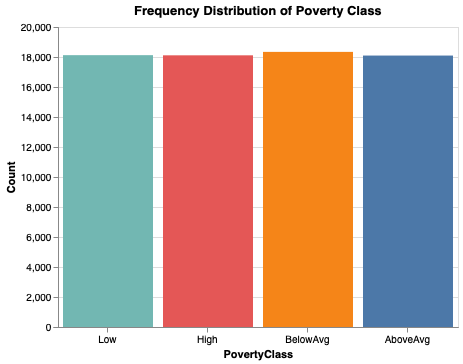

In [45]:
import altair as alt

#Count Poverty Class and convert to DF then rename values
povertyClass_count = data2015['PovertyClass'].value_counts()
povertyClass_count = povertyClass_count.to_frame()
povertyClass_count = povertyClass_count.reset_index()
povertyClass_count = povertyClass_count.rename(columns={"index": "PovertyClass", "PovertyClass": "Count"})
povertyClass_count["PovertyClass"] = pd.to_numeric(povertyClass_count["PovertyClass"])
povertyClass_count = povertyClass_count.replace([1,2,3,4], ['Low','BelowAvg','AboveAvg','High'])

#Create Chart
alt.Chart(povertyClass_count,title = 'Frequency Distribution of Poverty Class').mark_bar().encode(
    x = alt.X('PovertyClass', axis = alt.Axis(labelAngle = 0), sort = ["Low","Below Avg","Above Avg","High"]),
    y = 'Count',
    color = alt.Color('PovertyClass',legend = None)).properties(width = 400, height = 300)

#### **2.2.2 PovertyClass Scatter Plot Evaluation**

##### **2.2.2.1 Race**

###### **Race v Income Per Capita**

This scatter plot explores the relationship between each of our race variables and Income Per Capita. We can see some trending and separation here in census tracts with higher populations Asian, Native, and Hispanic populations having lower Income Per Capita. We can also see there is a trend of census tracts with higher populations of White populations having higher Income Per Capita. Income Per Capita could be a good variable to cluster with our race variables.

True


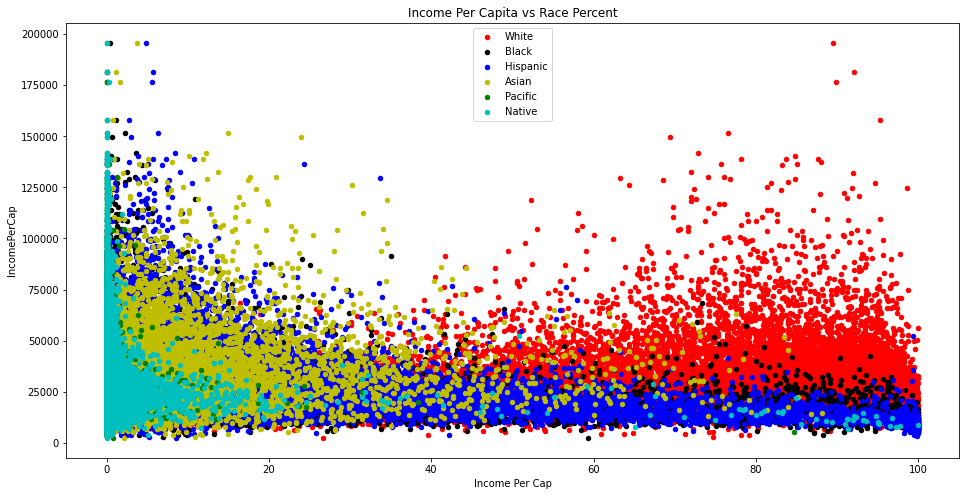

In [ ]:
census_pc_sample = census_pc.sample(frac = .25)
ax1 = census_pc_sample.plot(kind='scatter', x='White', y='IncomePerCap', color='r', title = 'Income Per Capita vs Race Percent', label = 'White', figsize = (16,8))    
ax2 = census_pc_sample.plot(kind='scatter', x='Black', y='IncomePerCap', color='k', ax=ax1, label = 'Black', figsize = (16,8))    
ax3 = census_pc_sample.plot(kind='scatter', x='Hispanic', y='IncomePerCap', color='b', ax=ax1, label = 'Hispanic', figsize = (16,8))
ax4 = census_pc_sample.plot(kind='scatter', x='Asian', y='IncomePerCap', color='y', ax=ax1, label = 'Asian', figsize = (16,8))
ax5 = census_pc_sample.plot(kind='scatter', x='Pacific', y='IncomePerCap', color='g', ax=ax1, label = 'Pacific', figsize = (16,8))
ax6 = census_pc_sample.plot(kind='scatter', x='Native', y='IncomePerCap', color='c', ax=ax1, label = 'Native', figsize = (16,8))
ax1.set_xlabel("Race Percent")
ax1.set_xlabel("Income Per Cap")

print(ax1 == ax2 == ax3 == ax4 == ax5 == ax6)

###### **Race v Citizen Percent**

This scatter plot explores the relationship between each of our race variables and Citizen Percent. This graphical depiction does not show any well defined separation that would allow us to assume clustering would be beneficial for modeling. We do not know that the races: White, Black, and Hispanic do tend to trend higher in the percentage of citizens. White while interesting, does not help us define any separation.

True


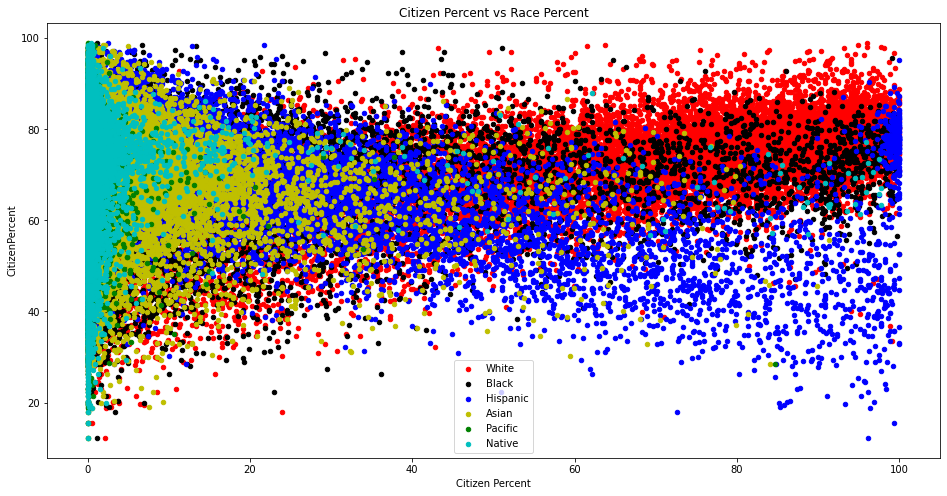

In [ ]:
ax1 = census_pc_sample.plot(kind='scatter', x='White', y='CitizenPercent', color='r', title = 'Citizen Percent vs Race Percent', label = 'White', figsize = (16,8))    
ax2 = census_pc_sample.plot(kind='scatter', x='Black', y='CitizenPercent', color='k', ax=ax1, label = 'Black', figsize = (16,8))    
ax3 = census_pc_sample.plot(kind='scatter', x='Hispanic', y='CitizenPercent', color='b', ax=ax1, label = 'Hispanic', figsize = (16,8))
ax4 = census_pc_sample.plot(kind='scatter', x='Asian', y='CitizenPercent', color='y', ax=ax1, label = 'Asian', figsize = (16,8))
ax5 = census_pc_sample.plot(kind='scatter', x='Pacific', y='CitizenPercent', color='g', ax=ax1, label = 'Pacific', figsize = (16,8))
ax6 = census_pc_sample.plot(kind='scatter', x='Native', y='CitizenPercent', color='c', ax=ax1, label = 'Native', figsize = (16,8))
ax1.set_xlabel("Race Percent")
ax1.set_xlabel("Citizen Percent")

print(ax1 == ax2 == ax3 == ax4 == ax5 == ax6)

The goal of this lab is to identify a subset of features to cluster on to improve the accuracy of our classification model. In our census_pc data set we have we have distinctive and obvious feature subsets that we are working with. 

These feature subsets are:

    The Dependent Variable: PovertyClass

    Race Variables: Hispanic, White, Black, Native, Asian, and Pacific

    Work Type Variables: Professional, Service, Office, Construction, and Production

    Transportation Type Variables: Drive, Carpool, Transit, Walk, OtherTransp, and WorkFromHome

    Sector Type Variables: PrivateWork, PublicWork, SelfEmployed, and FamilyWork

    Other One-Off Variables: IncomePerCap, CitizenPercent, ChildPoverty, MeanCommute, EmployedPercent, and Unemployment

Our goal is to combine each of our four distinctive feature subsets (Race, Work Type, Transportation Type, and Sector Type) with one of the other one-off variables (IncomePerCap, CitizenPercent, ChildPoverty, MeanCommute, EmployedPercent, and Unemployment) and then perform a cluster analysis on that combined feature subset. This will hopefully in turn increase the accuracy of our classification model.
To determine which one-off variable is best to cluster with each distinctive feature subset we visualize the relationships between each of the one-off variables and each of the four distinctive feature subsets. We do this through a series of scatter plots to see what separates out into trends. Each scatter plot represents a census tract data point.



###### **Race v Child Poverty Percentage**

This scatter plot explores the relationship between each of our race variables and Child Poverty Percentage. This graphical depiction does not show any well defined separation that would allow us to assume clustering would be beneficial for modeling. We do note that there seems to be a high level of child poverty within the Native and Hispanic community. However, due to the overlapping caused by volume it would still be difficult to cluster appropriately.

True


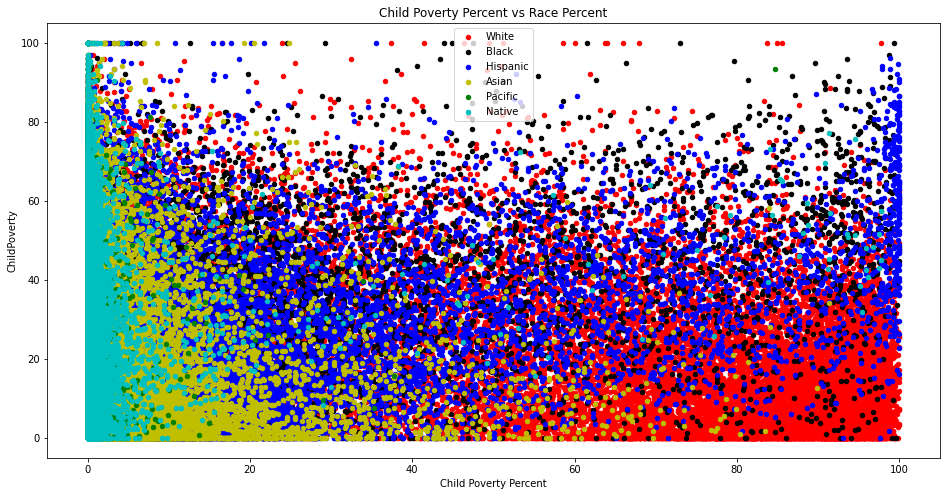

In [ ]:
ax1 = census_pc_sample.plot(kind='scatter', x='White', y='ChildPoverty', color='r', title = 'Child Poverty Percent vs Race Percent', label = 'White', figsize = (16,8))    
ax2 = census_pc_sample.plot(kind='scatter', x='Black', y='ChildPoverty', color='k', ax=ax1, label = 'Black', figsize = (16,8))    
ax3 = census_pc_sample.plot(kind='scatter', x='Hispanic', y='ChildPoverty', color='b', ax=ax1, label = 'Hispanic', figsize = (16,8))
ax4 = census_pc_sample.plot(kind='scatter', x='Asian', y='ChildPoverty', color='y', ax=ax1, label = 'Asian', figsize = (16,8))
ax5 = census_pc_sample.plot(kind='scatter', x='Pacific', y='ChildPoverty', color='g', ax=ax1, label = 'Pacific', figsize = (16,8))
ax6 = census_pc_sample.plot(kind='scatter', x='Native', y='ChildPoverty', color='c', ax=ax1, label = 'Native', figsize = (16,8))
ax1.set_xlabel("Race Percent")
ax1.set_xlabel("Child Poverty Percent")

print(ax1 == ax2 == ax3 == ax4 == ax5 == ax6)

###### **Race v Mean Commute**

This scatter plot explores the relationship between each of our race variables and Mean Commute. We see mostly overlap, as we have seen in all our previous graphs, however we do see much more of the white, hispanic, and black communities starting to trend up for high mean commute times.

True


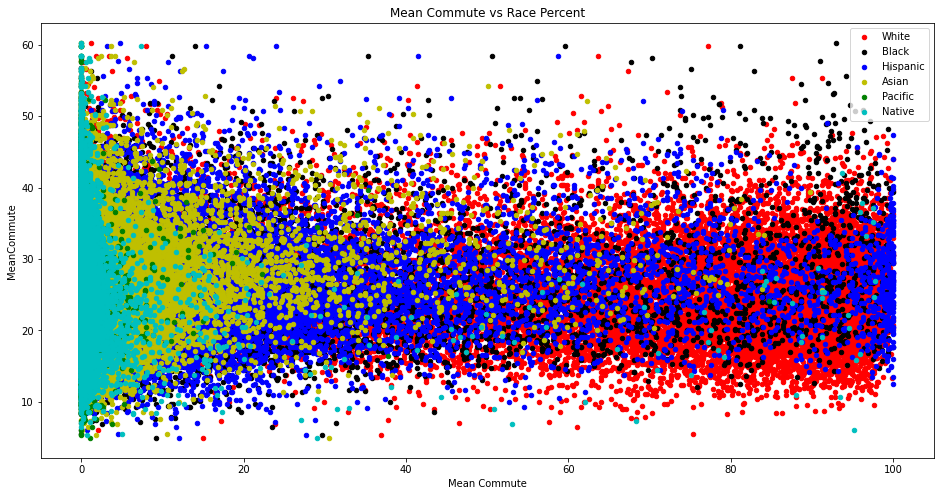

In [ ]:
ax1 = census_pc_sample.plot(kind='scatter', x='White', y='MeanCommute', color='r', title = 'Mean Commute vs Race Percent', label = 'White', figsize = (16,8))    
ax2 = census_pc_sample.plot(kind='scatter', x='Black', y='MeanCommute', color='k', ax=ax1, label = 'Black', figsize = (16,8))    
ax3 = census_pc_sample.plot(kind='scatter', x='Hispanic', y='MeanCommute', color='b', ax=ax1, label = 'Hispanic', figsize = (16,8))
ax4 = census_pc_sample.plot(kind='scatter', x='Asian', y='MeanCommute', color='y', ax=ax1, label = 'Asian', figsize = (16,8))
ax5 = census_pc_sample.plot(kind='scatter', x='Pacific', y='MeanCommute', color='g', ax=ax1, label = 'Pacific', figsize = (16,8))
ax6 = census_pc_sample.plot(kind='scatter', x='Native', y='MeanCommute', color='c', ax=ax1, label = 'Native', figsize = (16,8))
ax1.set_xlabel("Race Percent")
ax1.set_xlabel("Mean Commute")

print(ax1 == ax2 == ax3 == ax4 == ax5 == ax6)

###### **Race v Employed Percentage**

This scatter plot explores the relationship between each of our race variables and Employed Percentage. We see mostly overlap, as we have seen in all our previous graphs, however we do see the Asian ethnic groups seem to be the least spread favoring high employed percentages.

True


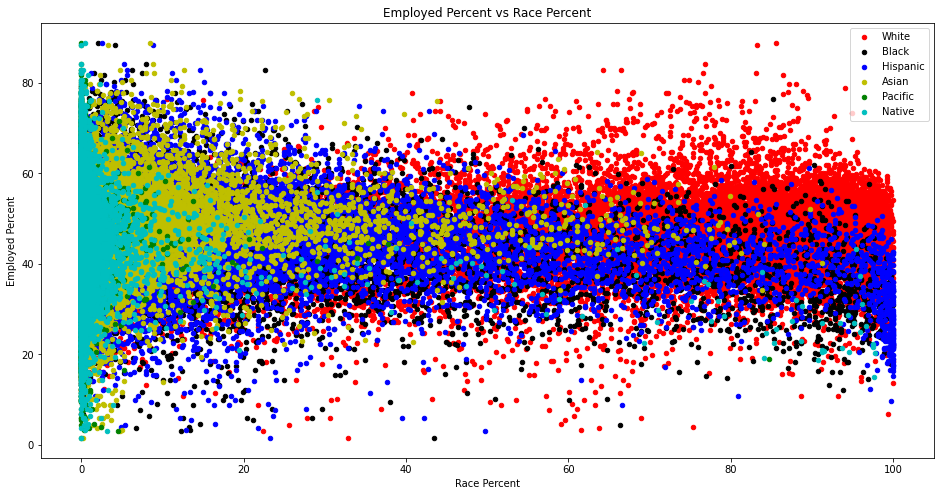

In [ ]:
ax1 = census_pc_sample.plot(kind='scatter', x='White', y='EmployedPercent', color='r', title = 'Employed Percent vs Race Percent', label = 'White', figsize = (16,8))    
ax2 = census_pc_sample.plot(kind='scatter', x='Black', y='EmployedPercent', color='k', ax=ax1, label = 'Black', figsize = (16,8))    
ax3 = census_pc_sample.plot(kind='scatter', x='Hispanic', y='EmployedPercent', color='b', ax=ax1, label = 'Hispanic', figsize = (16,8))
ax4 = census_pc_sample.plot(kind='scatter', x='Asian', y='EmployedPercent', color='y', ax=ax1, label = 'Asian', figsize = (16,8))
ax5 = census_pc_sample.plot(kind='scatter', x='Pacific', y='EmployedPercent', color='g', ax=ax1, label = 'Pacific', figsize = (16,8))
ax6 = census_pc_sample.plot(kind='scatter', x='Native', y='EmployedPercent', color='c', ax=ax1, label = 'Native', figsize = (16,8))
ax1.set_xlabel("Race Percent")
ax1.set_ylabel("Employed Percent")

print(ax1 == ax2 == ax3 == ax4 == ax5 == ax6)

###### **Race v Unemployed Percentage**

This scatter plot explores the relationship between each of our race variables and Unemployment Percentage. We see heavy overlap, as we have seen in all our previous graphs, however we do see the Black ethnic trend in the higher percentages for the higher unemployment rate. This could mean this ethnic group inclusion would allow for good separation to predict poverty class.

True


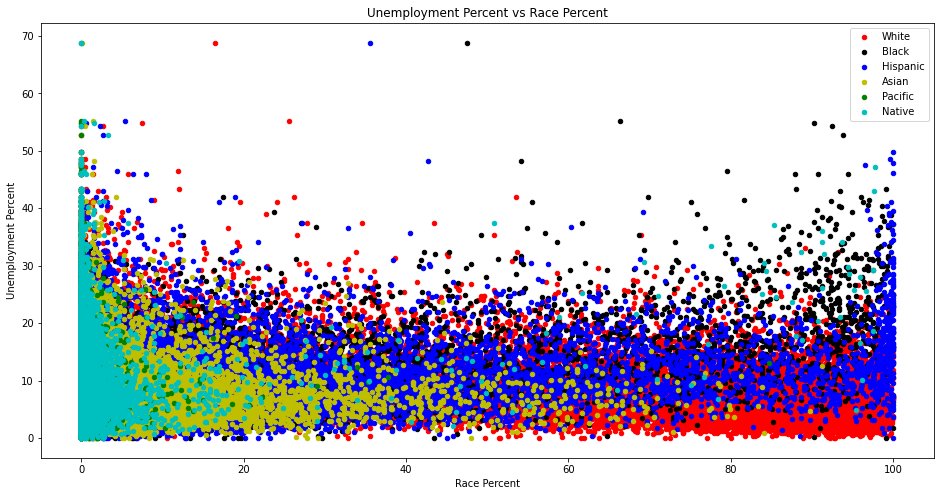

In [ ]:
ax1 = census_pc_sample.plot(kind='scatter', x='White', y='Unemployment', color='r', title = 'Unemployment Percent vs Race Percent', label = 'White', figsize = (16,8))    
ax2 = census_pc_sample.plot(kind='scatter', x='Black', y='Unemployment', color='k', ax=ax1, label = 'Black', figsize = (16,8))    
ax3 = census_pc_sample.plot(kind='scatter', x='Hispanic', y='Unemployment', color='b', ax=ax1, label = 'Hispanic', figsize = (16,8))
ax4 = census_pc_sample.plot(kind='scatter', x='Asian', y='Unemployment', color='y', ax=ax1, label = 'Asian', figsize = (16,8))
ax5 = census_pc_sample.plot(kind='scatter', x='Pacific', y='Unemployment', color='g', ax=ax1, label = 'Pacific', figsize = (16,8))
ax6 = census_pc_sample.plot(kind='scatter', x='Native', y='Unemployment', color='c', ax=ax1, label = 'Native', figsize = (16,8))
ax1.set_xlabel("Race Percent")
ax1.set_ylabel("Unemployment Percent")

print(ax1 == ax2 == ax3 == ax4 == ax5 == ax6)

##### **2.2.2.2 Work Type**

###### **Work Type v Income Per Capita**

This scatter plot explores the relationship between each of our work type variables and Income Per Capita. We see some very discrete separation. Knowing Income Per Capita and Work Type creating such good separation, something like ethnicity groups together with these variables could create a good clustering model.

True


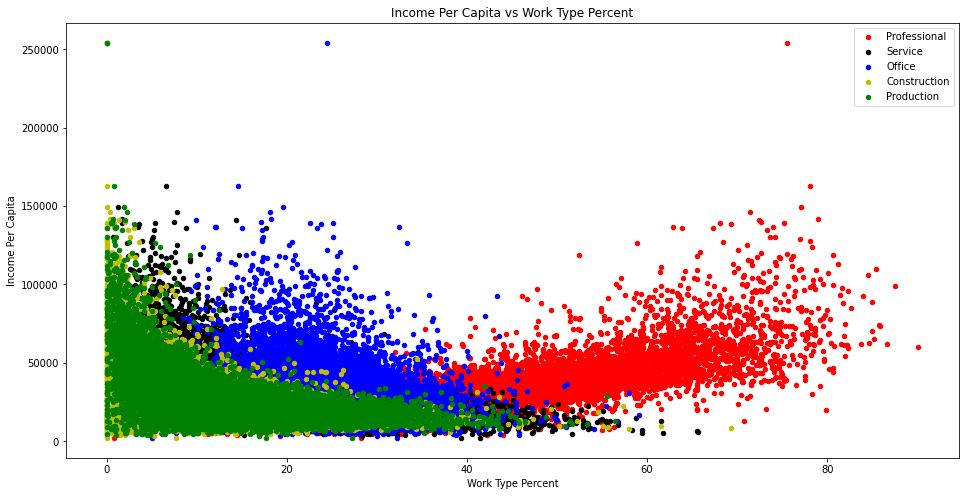

In [ ]:
ax1 = census_pc_sample.plot(kind='scatter', x='Professional', y='IncomePerCap', color='r', title = 'Income Per Capita vs Work Type Percent', label = 'Professional', figsize = (16,8))    
ax2 = census_pc_sample.plot(kind='scatter', x='Service', y='IncomePerCap', color='k', ax=ax1, label = 'Service', figsize = (16,8))    
ax3 = census_pc_sample.plot(kind='scatter', x='Office', y='IncomePerCap', color='b', ax=ax1, label = 'Office', figsize = (16,8))
ax4 = census_pc_sample.plot(kind='scatter', x='Construction', y='IncomePerCap', color='y', ax=ax1, label = 'Construction', figsize = (16,8))
ax5 = census_pc_sample.plot(kind='scatter', x='Production', y='IncomePerCap', color='g', ax=ax1, label = 'Production', figsize = (16,8))
ax1.set_xlabel("Work Type Percent")
ax1.set_ylabel("Income Per Capita")

print(ax1 == ax2 == ax3 == ax4 == ax5)

###### **Work Type v Citizen Percent**

This scatter plot explores the relationship between each of our work type variables and Citizen Percent. With Work Type and Citizen Percent we see a lot more overlap than the above graph. We do notice that professional services tend to trend towards high citizen percent, but this does not appear to create enough separation to model for clustering classification.

True


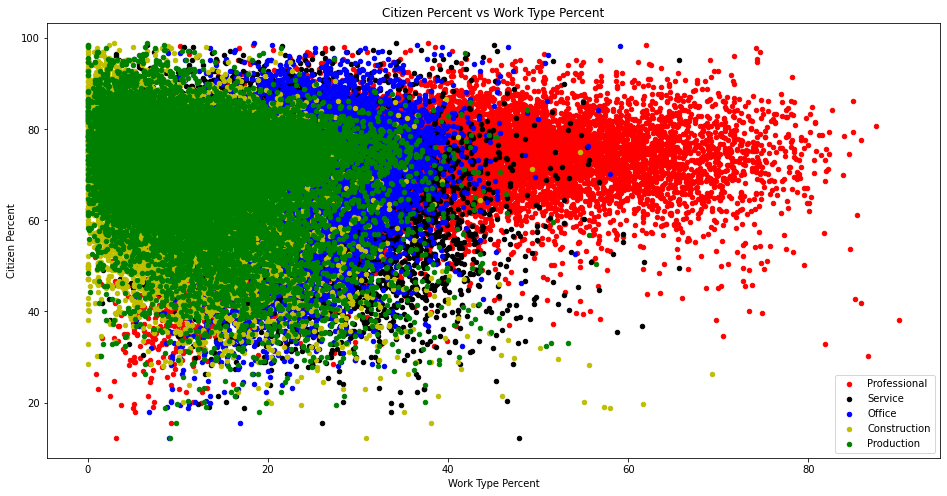

In [ ]:
ax1 = census_pc_sample.plot(kind='scatter', x='Professional', y='CitizenPercent', color='r', title = 'Citizen Percent vs Work Type Percent', label = 'Professional', figsize = (16,8))    
ax2 = census_pc_sample.plot(kind='scatter', x='Service', y='CitizenPercent', color='k', ax=ax1, label = 'Service', figsize = (16,8))    
ax3 = census_pc_sample.plot(kind='scatter', x='Office', y='CitizenPercent', color='b', ax=ax1, label = 'Office', figsize = (16,8))
ax4 = census_pc_sample.plot(kind='scatter', x='Construction', y='CitizenPercent', color='y', ax=ax1, label = 'Construction', figsize = (16,8))
ax5 = census_pc_sample.plot(kind='scatter', x='Production', y='CitizenPercent', color='g', ax=ax1, label = 'Production', figsize = (16,8))
ax1.set_xlabel("Work Type Percent")
ax1.set_ylabel("Citizen Percent")

print(ax1 == ax2 == ax3 == ax4 == ax5)

###### **Work Type v Child Poverty Percentage**

This scatter plot explores the relationship between each of our work type variables and Child Poverty Percentage. Like above, we see some pretty heavy overlap for the largest grouping of Work Type versus Child Poverty. This again would leave us to believe that this variable grouping would not create the best separation for a clustering model.

True


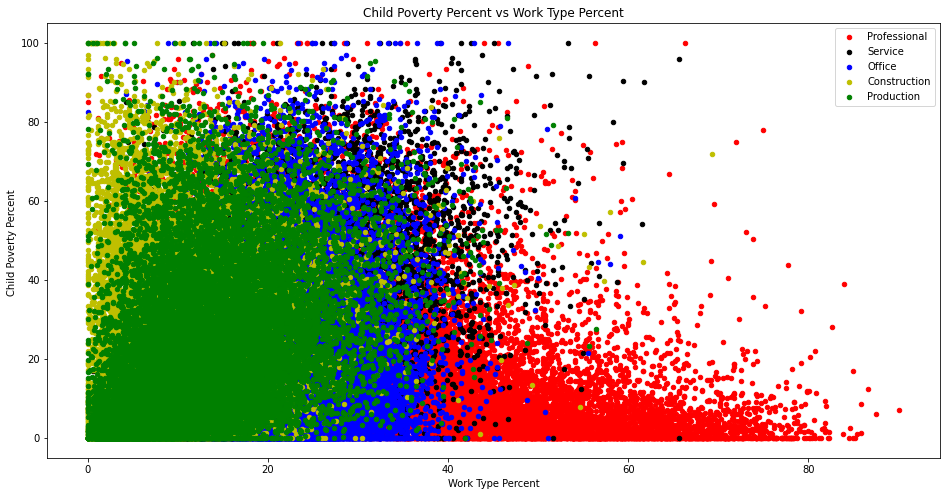

In [ ]:
ax1 = census_pc_sample.plot(kind='scatter', x='Professional', y='ChildPoverty', color='r', title = 'Child Poverty Percent vs Work Type Percent', label = 'Professional', figsize = (16,8))    
ax2 = census_pc_sample.plot(kind='scatter', x='Service', y='ChildPoverty', color='k', ax=ax1, label = 'Service', figsize = (16,8))    
ax3 = census_pc_sample.plot(kind='scatter', x='Office', y='ChildPoverty', color='b', ax=ax1, label = 'Office', figsize = (16,8))
ax4 = census_pc_sample.plot(kind='scatter', x='Construction', y='ChildPoverty', color='y', ax=ax1, label = 'Construction', figsize = (16,8))
ax5 = census_pc_sample.plot(kind='scatter', x='Production', y='ChildPoverty', color='g', ax=ax1, label = 'Production', figsize = (16,8))
ax1.set_xlabel("Work Type Percent")
ax1.set_ylabel("Child Poverty Percent ")

print(ax1 == ax2 == ax3 == ax4 == ax5)

###### **Work Type v Mean Commute**

This scatter plot explores the relationship between each of our work type variables and Mean Commute. We see some separation with the professional work group tending towards a high mean commute, this however, does not separate enough from the large majority of the volume that appears to be overlapping. This would not be a good group of variables for clustering classification methods. 

True


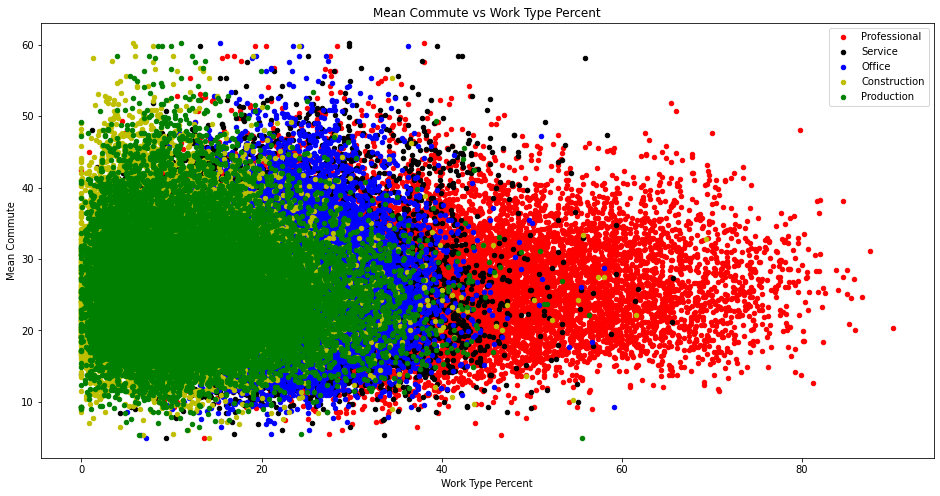

In [ ]:
ax1 = census_pc_sample.plot(kind='scatter', x='Professional', y='MeanCommute', color='r', title = 'Mean Commute vs Work Type Percent', label = 'Professional', figsize = (16,8))    
ax2 = census_pc_sample.plot(kind='scatter', x='Service', y='MeanCommute', color='k', ax=ax1, label = 'Service', figsize = (16,8))    
ax3 = census_pc_sample.plot(kind='scatter', x='Office', y='MeanCommute', color='b', ax=ax1, label = 'Office', figsize = (16,8))
ax4 = census_pc_sample.plot(kind='scatter', x='Construction', y='MeanCommute', color='y', ax=ax1, label = 'Construction', figsize = (16,8))
ax5 = census_pc_sample.plot(kind='scatter', x='Production', y='MeanCommute', color='g', ax=ax1, label = 'Production', figsize = (16,8))
ax1.set_xlabel("Work Type Percent")
ax1.set_ylabel("Mean Commute")

print(ax1 == ax2 == ax3 == ax4 == ax5)

###### **Work Type v Employed Percent**

This scatter plot explores the relationship between each of our work type variables and Employed Percent. For the most part all work types are overlapping for the majority of volume for this combination of variable groupings. We do see that because these are work types they tend to be on the higher side of employed percent. This is expected because being able to claim a work type would align with employed. That being said, this would inevitably not be a good combination of variable groupings for clustering classification methods.

True


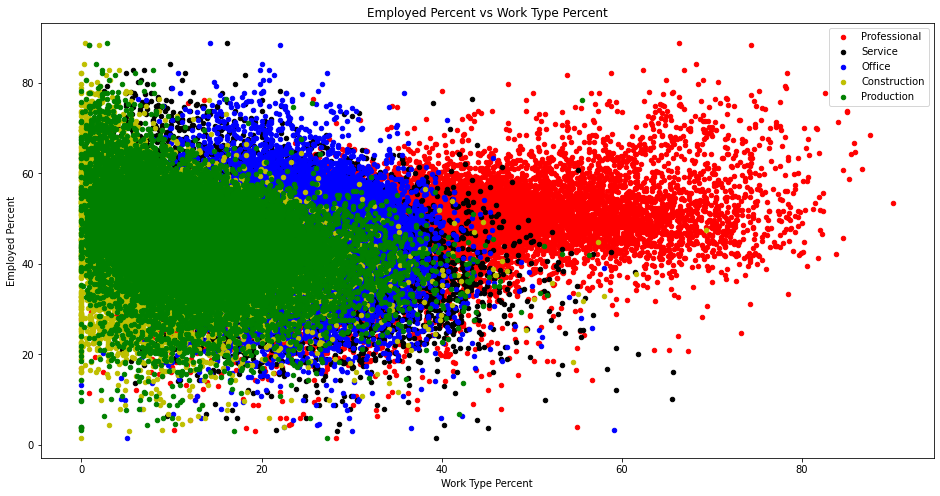

In [ ]:
ax1 = census_pc_sample.plot(kind='scatter', x='Professional', y='EmployedPercent', color='r', title = 'Employed Percent vs Work Type Percent', label = 'Professional', figsize = (16,8))    
ax2 = census_pc_sample.plot(kind='scatter', x='Service', y='EmployedPercent', color='k', ax=ax1, label = 'Service', figsize = (16,8))    
ax3 = census_pc_sample.plot(kind='scatter', x='Office', y='EmployedPercent', color='b', ax=ax1, label = 'Office', figsize = (16,8))
ax4 = census_pc_sample.plot(kind='scatter', x='Construction', y='EmployedPercent', color='y', ax=ax1, label = 'Construction', figsize = (16,8))
ax5 = census_pc_sample.plot(kind='scatter', x='Production', y='EmployedPercent', color='g', ax=ax1, label = 'Production', figsize = (16,8))
ax1.set_xlabel("Work Type Percent")
ax1.set_ylabel("Employed Percent")

print(ax1 == ax2 == ax3 == ax4 == ax5)

###### **Work Type v Unemployed Percent**

This scatter plot explores the relationship between each of our work type variables and Unemployment Percent. We notice that the professional work type tends to be on the lower side of unemployment percent. However, we also notice that all work types are overlapping at the lower percentages and therefore this would not be a good grouping for cluster classification.

True


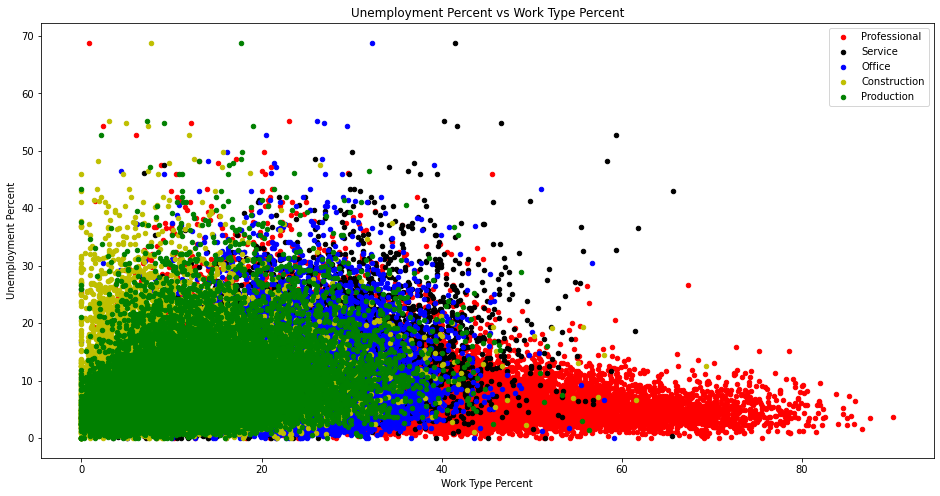

In [ ]:
ax1 = census_pc_sample.plot(kind='scatter', x='Professional', y='Unemployment', color='r', title = 'Unemployment Percent vs Work Type Percent', label = 'Professional', figsize = (16,8))    
ax2 = census_pc_sample.plot(kind='scatter', x='Service', y='Unemployment', color='k', ax=ax1, label = 'Service', figsize = (16,8))    
ax3 = census_pc_sample.plot(kind='scatter', x='Office', y='Unemployment', color='b', ax=ax1, label = 'Office', figsize = (16,8))
ax4 = census_pc_sample.plot(kind='scatter', x='Construction', y='Unemployment', color='y', ax=ax1, label = 'Construction', figsize = (16,8))
ax5 = census_pc_sample.plot(kind='scatter', x='Production', y='Unemployment', color='g', ax=ax1, label = 'Production', figsize = (16,8))
ax1.set_xlabel("Work Type Percent")
ax1.set_ylabel("Unemployment Percent")

print(ax1 == ax2 == ax3 == ax4 == ax5)

##### **2.2.2.3 Transportation**

###### **Transportation v Income Per Capita**

This scatter plot explores the relationship between each of our transportation type variables and Income Per Capita. This chart explores income per capita as well as proportion of the population using specific types of transporation to commute. Drive is highly seperated from other modes of transportation with a much larger proportion of census tracts having high proportion of drivers. Other transporation methods seem to show some seperaation between income per capita, with larger proportion of people using transit, walking, or carpooling tends toward lower income tracts. 


True


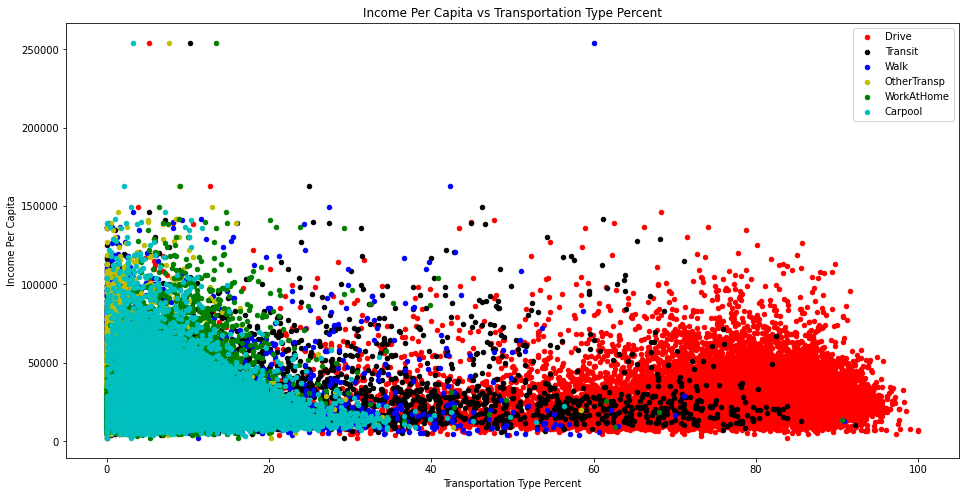

In [ ]:
ax1 = census_pc_sample.plot(kind='scatter', x='Drive', y='IncomePerCap', color='r', title = 'Income Per Capita vs Transportation Type Percent', label = 'Drive', figsize = (16,8))    
ax2 = census_pc_sample.plot(kind='scatter', x='Transit', y='IncomePerCap', color='k', ax=ax1, label = 'Transit', figsize = (16,8))    
ax3 = census_pc_sample.plot(kind='scatter', x='Walk', y='IncomePerCap', color='b', ax=ax1, label = 'Walk', figsize = (16,8))
ax4 = census_pc_sample.plot(kind='scatter', x='OtherTransp', y='IncomePerCap', color='y', ax=ax1, label = 'OtherTransp', figsize = (16,8))
ax5 = census_pc_sample.plot(kind='scatter', x='WorkAtHome', y='IncomePerCap', color='g', ax=ax1, label = 'WorkAtHome', figsize = (16,8))
ax6 = census_pc_sample.plot(kind='scatter', x='Carpool', y='IncomePerCap', color='c', ax=ax1, label = 'Carpool', figsize = (16,8))
ax1.set_xlabel("Transportation Type Percent")
ax1.set_ylabel("Income Per Capita")

print(ax1 == ax2 == ax3 == ax4 == ax5 == ax6)

###### **Transportation v Citizen Percent**

This scatter plot explores the relationship between each of our transportation type variables and Citizen Percent. Again we can see driving as a means of transport sepearted with much larger proportions in census tracts than other means of transport. In occurence with citizen percent however, none of our transportation methods seem to show strong seperation, we can't see a strong pattern between any mode of transportation and citizen percent. 

True


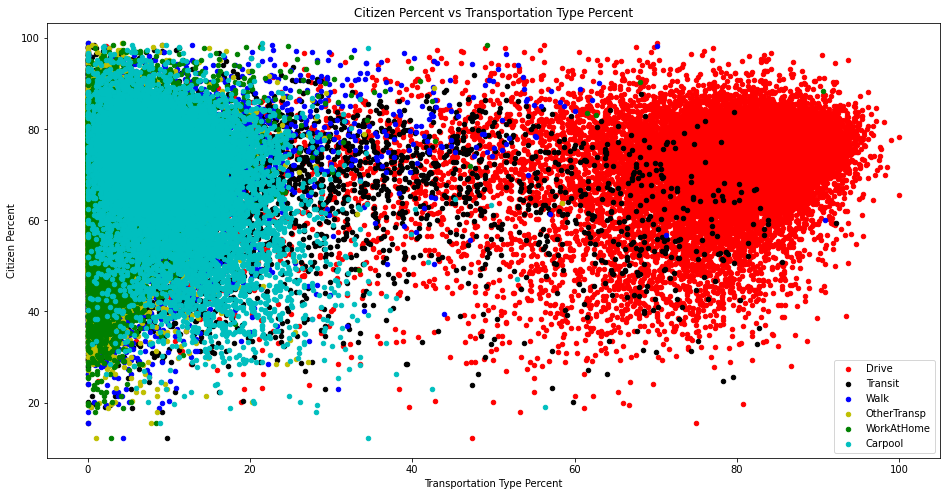

In [ ]:
ax1 = census_pc_sample.plot(kind='scatter', x='Drive', y='CitizenPercent', color='r', title = 'Citizen Percent vs Transportation Type Percent', label = 'Drive', figsize = (16,8))    
ax2 = census_pc_sample.plot(kind='scatter', x='Transit', y='CitizenPercent', color='k', ax=ax1, label = 'Transit', figsize = (16,8))    
ax3 = census_pc_sample.plot(kind='scatter', x='Walk', y='CitizenPercent', color='b', ax=ax1, label = 'Walk', figsize = (16,8))
ax4 = census_pc_sample.plot(kind='scatter', x='OtherTransp', y='CitizenPercent', color='y', ax=ax1, label = 'OtherTransp', figsize = (16,8))
ax5 = census_pc_sample.plot(kind='scatter', x='WorkAtHome', y='CitizenPercent', color='g', ax=ax1, label = 'WorkAtHome', figsize = (16,8))
ax6 = census_pc_sample.plot(kind='scatter', x='Carpool', y='CitizenPercent', color='c', ax=ax1, label = 'Carpool', figsize = (16,8))
ax1.set_xlabel("Transportation Type Percent")
ax1.set_ylabel("Citizen Percent")

print(ax1 == ax2 == ax3 == ax4 == ax5 == ax6)

###### **Transportation v Child Poverty Percent**

This scatter plot explores the relationship between each of our transportation type variables and Child Poverty Percent. Driving as a means of trasport is again a dominant force seperated from other modes of transport. Driving as a cluster specifically at high proportions of driving seem to connect less to higher percentages of Child Poverty than other modes of transport. The difference however may not be pronounced enough to affect our problem. 

True


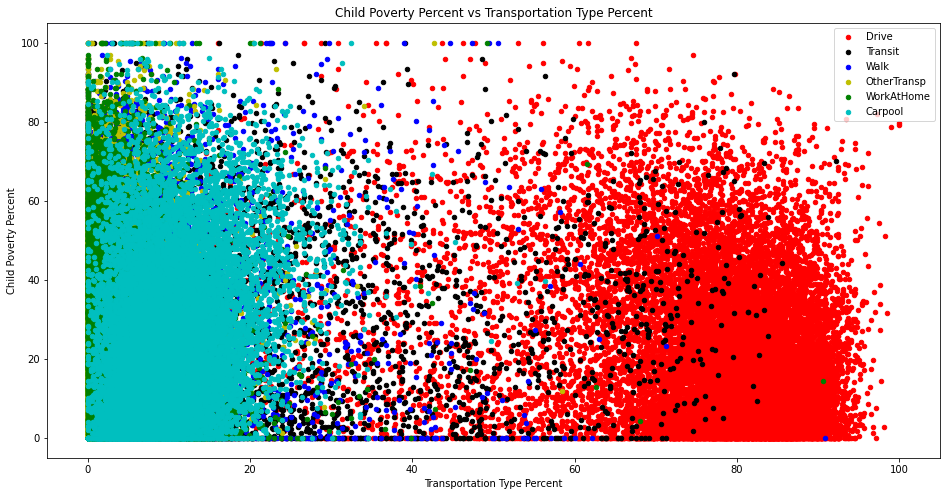

In [ ]:
ax1 = census_pc_sample.plot(kind='scatter', x='Drive', y='ChildPoverty', color='r', title = 'Child Poverty Percent vs Transportation Type Percent', label = 'Drive', figsize = (16,8))    
ax2 = census_pc_sample.plot(kind='scatter', x='Transit', y='ChildPoverty', color='k', ax=ax1, label = 'Transit', figsize = (16,8))    
ax3 = census_pc_sample.plot(kind='scatter', x='Walk', y='ChildPoverty', color='b', ax=ax1, label = 'Walk', figsize = (16,8))
ax4 = census_pc_sample.plot(kind='scatter', x='OtherTransp', y='ChildPoverty', color='y', ax=ax1, label = 'OtherTransp', figsize = (16,8))
ax5 = census_pc_sample.plot(kind='scatter', x='WorkAtHome', y='ChildPoverty', color='g', ax=ax1, label = 'WorkAtHome', figsize = (16,8))
ax6 = census_pc_sample.plot(kind='scatter', x='Carpool', y='ChildPoverty', color='c', ax=ax1, label = 'Carpool', figsize = (16,8))
ax1.set_xlabel("Transportation Type Percent")
ax1.set_ylabel("Child Poverty Percent")

print(ax1 == ax2 == ax3 == ax4 == ax5 == ax6)

###### **Transportation v Mean Commute**

This scatter plot explores the relationship between each of our transportation type variables and Mean Commute. As one would expect we  can see some relationship and seperation between our categories between modes of commuting and time to commute. Transit tends towards higher mean commute times than other transportation methods overall. Walking tends toward lower mean commute times. Carpooling and driving seem to have similar spreads on mean commute time and are seperated mostly by proportion of use.

True


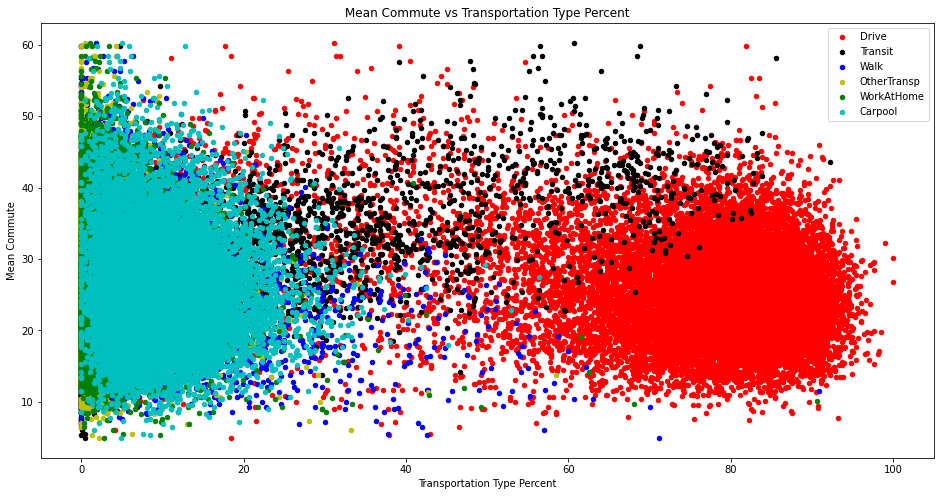

In [ ]:
ax1 = census_pc_sample.plot(kind='scatter', x='Drive', y='MeanCommute', color='r', title = 'Mean Commute vs Transportation Type Percent', label = 'Drive', figsize = (16,8))    
ax2 = census_pc_sample.plot(kind='scatter', x='Transit', y='MeanCommute', color='k', ax=ax1, label = 'Transit', figsize = (16,8))    
ax3 = census_pc_sample.plot(kind='scatter', x='Walk', y='MeanCommute', color='b', ax=ax1, label = 'Walk', figsize = (16,8))
ax4 = census_pc_sample.plot(kind='scatter', x='OtherTransp', y='MeanCommute', color='y', ax=ax1, label = 'OtherTransp', figsize = (16,8))
ax5 = census_pc_sample.plot(kind='scatter', x='WorkAtHome', y='MeanCommute', color='g', ax=ax1, label = 'WorkAtHome', figsize = (16,8))
ax6 = census_pc_sample.plot(kind='scatter', x='Carpool', y='MeanCommute', color='c', ax=ax1, label = 'Carpool', figsize = (16,8))
ax1.set_xlabel("Transportation Type Percent")
ax1.set_ylabel("Mean Commute")

print(ax1 == ax2 == ax3 == ax4 == ax5 == ax6)

###### **Transportation v Employed Percent**

This scatter plot explores the relationship between each of our transportation type variables and Employed Percent. Most modes of transportation hover around a similar distribution with much of the mass between twenty and seventy five percent employment. There is again major seperation of transit and drive methods of transport, but this seperation only occurs on the plane of proportion of census tracts in transit, not in proportion of employment. 




True


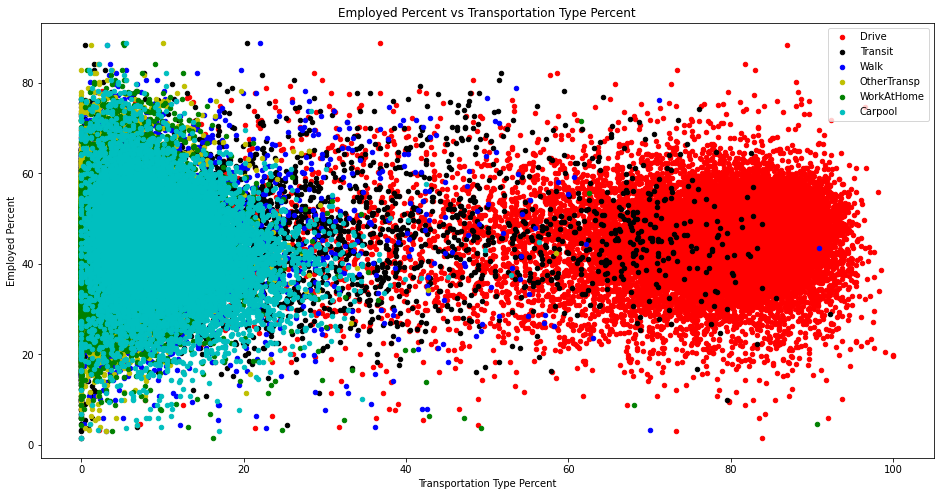

In [ ]:
ax1 = census_pc_sample.plot(kind='scatter', x='Drive', y='EmployedPercent', color='r', title = 'Employed Percent vs Transportation Type Percent', label = 'Drive', figsize = (16,8))    
ax2 = census_pc_sample.plot(kind='scatter', x='Transit', y='EmployedPercent', color='k', ax=ax1, label = 'Transit', figsize = (16,8))    
ax3 = census_pc_sample.plot(kind='scatter', x='Walk', y='EmployedPercent', color='b', ax=ax1, label = 'Walk', figsize = (16,8))
ax4 = census_pc_sample.plot(kind='scatter', x='OtherTransp', y='EmployedPercent', color='y', ax=ax1, label = 'OtherTransp', figsize = (16,8))
ax5 = census_pc_sample.plot(kind='scatter', x='WorkAtHome', y='EmployedPercent', color='g', ax=ax1, label = 'WorkAtHome', figsize = (16,8))
ax6 = census_pc_sample.plot(kind='scatter', x='Carpool', y='EmployedPercent', color='c', ax=ax1, label = 'Carpool', figsize = (16,8))
ax1.set_xlabel("Transportation Type Percent")
ax1.set_ylabel("Employed Percent")

print(ax1 == ax2 == ax3 == ax4 == ax5 == ax6)

###### **Transportation v Unemployed Percent**

This scatter plot explores the relationship between each of our transportation type variables and Unemployment Rate. We see drive and transit again seperating out on the plane of proportion of commute mode. Transportation of carpooling, other and working from home seem to have a higher density at high unemployment overall than drive and transit type transportation. There is slight seperation from that difference in density on the less popular transportation methods, but it may not be strong enough seperation to affect our problem. 

True


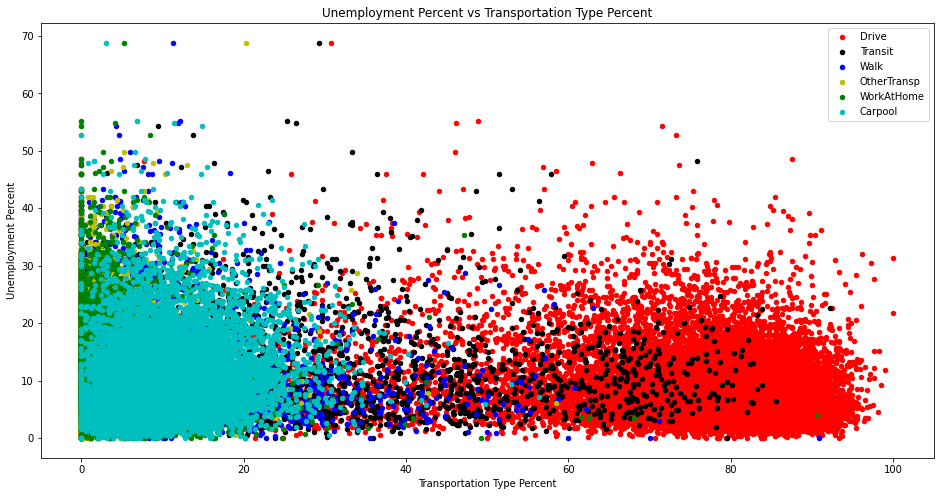

In [ ]:
ax1 = census_pc_sample.plot(kind='scatter', x='Drive', y='Unemployment', color='r', title = 'Unemployment Percent vs Transportation Type Percent', label = 'Drive', figsize = (16,8))    
ax2 = census_pc_sample.plot(kind='scatter', x='Transit', y='Unemployment', color='k', ax=ax1, label = 'Transit', figsize = (16,8))    
ax3 = census_pc_sample.plot(kind='scatter', x='Walk', y='Unemployment', color='b', ax=ax1, label = 'Walk', figsize = (16,8))
ax4 = census_pc_sample.plot(kind='scatter', x='OtherTransp', y='Unemployment', color='y', ax=ax1, label = 'OtherTransp', figsize = (16,8))
ax5 = census_pc_sample.plot(kind='scatter', x='WorkAtHome', y='Unemployment', color='g', ax=ax1, label = 'WorkAtHome', figsize = (16,8))
ax6 = census_pc_sample.plot(kind='scatter', x='Carpool', y='Unemployment', color='c', ax=ax1, label = 'Carpool', figsize = (16,8))
ax1.set_xlabel("Transportation Type Percent")
ax1.set_ylabel("Unemployment Percent")

print(ax1 == ax2 == ax3 == ax4 == ax5 == ax6)

##### **2.2.2.4 Sector**

###### **Sector v Income Per Capita**

This scatter plot explores the relationship between each of our sector type variables and Income Per Capita. In this chart we can see really good seperation in Private work vs the other sectors at around 50% sector type percent. Below 50% the other sectors Pulbic Work, Self Employed, and Family work are much closer together. FamilyWork and SelfEmployed show some seperation around 10% of sector type and the least amount of seperation is between Public Work and SelfEmplyed.

True


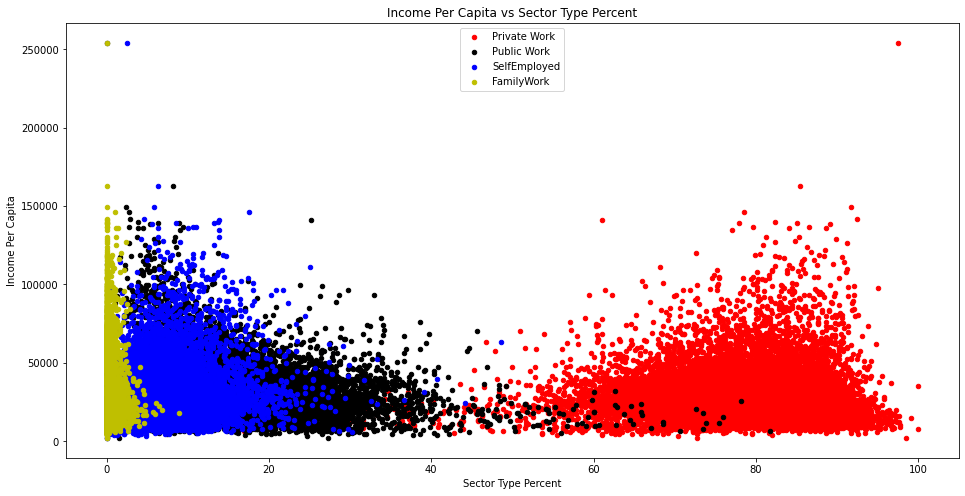

In [ ]:
ax1 = census_pc_sample.plot(kind='scatter', x='PrivateWork', y='IncomePerCap', color='r', title = 'Income Per Capita vs Sector Type Percent', label = 'Private Work', figsize = (16,8))    
ax2 = census_pc_sample.plot(kind='scatter', x='PublicWork', y='IncomePerCap', color='k', ax=ax1, label = 'Public Work', figsize = (16,8))    
ax3 = census_pc_sample.plot(kind='scatter', x='SelfEmployed', y='IncomePerCap', color='b', ax=ax1, label = 'SelfEmployed', figsize = (16,8))
ax4 = census_pc_sample.plot(kind='scatter', x='FamilyWork', y='IncomePerCap', color='y', ax=ax1, label = 'FamilyWork', figsize = (16,8))
ax1.set_xlabel("Sector Type Percent")
ax1.set_ylabel("Income Per Capita")

print(ax1 == ax2 == ax3 == ax4)

###### **Sector v Citizen Percent**

This scatter plot explores the relationship between each of our sector type variables and Citizen Percent. This scatter plot shows very similar results in seperation as the previous plot with the difference being that unlike IncomePer Capita that has most observations below $50,000 this chart is almost the inverse of that with most observations between 60 and 80% citizen Percent. 

True


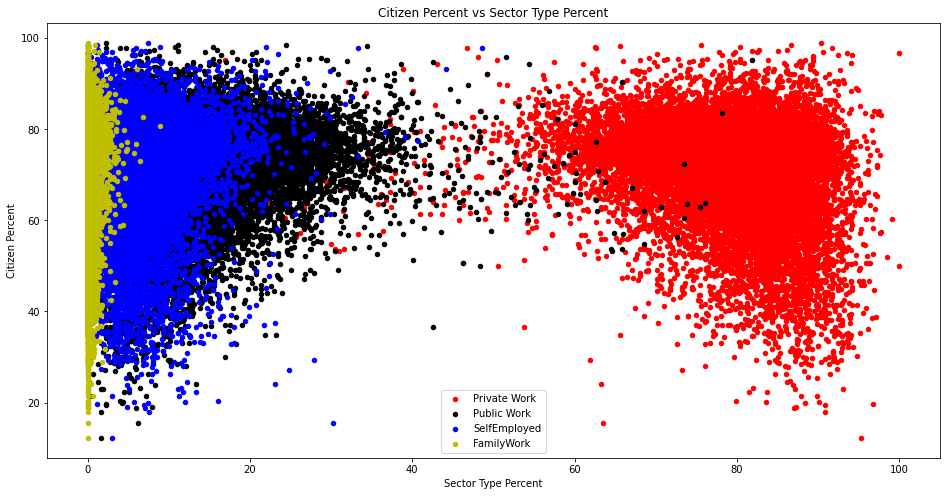

In [ ]:
ax1 = census_pc_sample.plot(kind='scatter', x='PrivateWork', y='CitizenPercent', color='r', title = 'Citizen Percent vs Sector Type Percent', label = 'Private Work', figsize = (16,8))    
ax2 = census_pc_sample.plot(kind='scatter', x='PublicWork', y='CitizenPercent', color='k', ax=ax1, label = 'Public Work', figsize = (16,8))    
ax3 = census_pc_sample.plot(kind='scatter', x='SelfEmployed', y='CitizenPercent', color='b', ax=ax1, label = 'SelfEmployed', figsize = (16,8))
ax4 = census_pc_sample.plot(kind='scatter', x='FamilyWork', y='CitizenPercent', color='y', ax=ax1, label = 'FamilyWork', figsize = (16,8))
ax1.set_xlabel("Sector Type Percent")
ax1.set_ylabel("Citizen Percent")

print(ax1 == ax2 == ax3 == ax4)

###### **Sector v Child Poverty Percent**

This scatter plot explores the relationship between each of our sector type variables and Child Poverty Percent. Using Child Poverty Percentage we agin see similar seperation based on sector to the previous plots but the distribution of child poverty is seems to be much more evenly distributed throughout the range of Child Poverty Percentage. This seems to indicate that child poverty is present regardless of Sector Type Percentage.

True


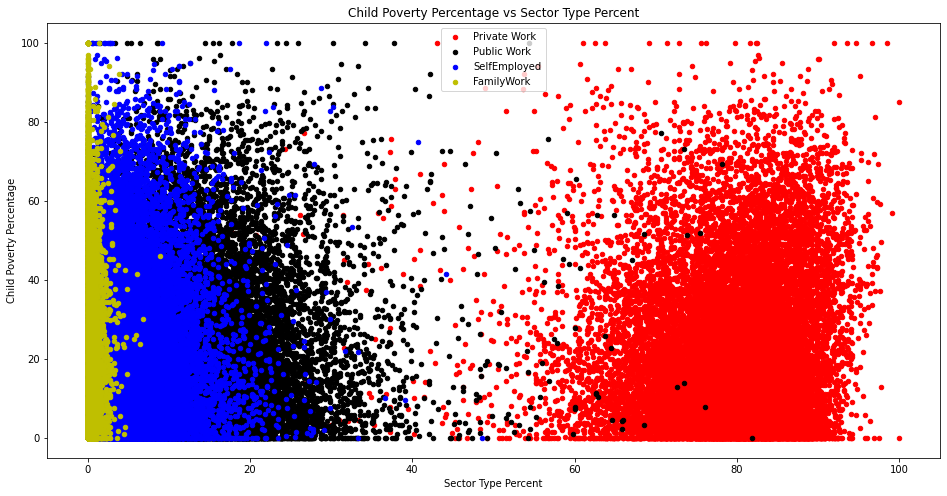

In [ ]:
ax1 = census_pc_sample.plot(kind='scatter', x='PrivateWork', y='ChildPoverty', color='r', title = 'Child Poverty Percentage vs Sector Type Percent', label = 'Private Work', figsize = (16,8))    
ax2 = census_pc_sample.plot(kind='scatter', x='PublicWork', y='ChildPoverty', color='k', ax=ax1, label = 'Public Work', figsize = (16,8))    
ax3 = census_pc_sample.plot(kind='scatter', x='SelfEmployed', y='ChildPoverty', color='b', ax=ax1, label = 'SelfEmployed', figsize = (16,8))
ax4 = census_pc_sample.plot(kind='scatter', x='FamilyWork', y='ChildPoverty', color='y', ax=ax1, label = 'FamilyWork', figsize = (16,8))
ax1.set_xlabel("Sector Type Percent")
ax1.set_ylabel("Child Poverty Percentage")

print(ax1 == ax2 == ax3 == ax4)

###### **Sector v Mean Commute**

This scatter plot explores the relationship between each of our sector type variables and Mean Commute. Mean commute continues the trend we see in the seperation of sector types but unlike the other relationships using mean commute seems to give us much more defined clusters and better seperation between all of our sectors.

True


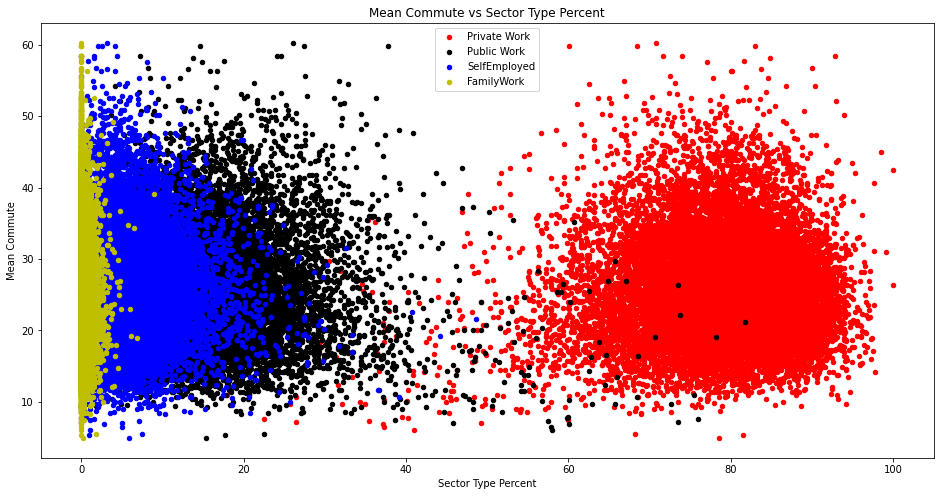

In [ ]:
ax1 = census_pc_sample.plot(kind='scatter', x='PrivateWork', y='MeanCommute', color='r', title = 'Mean Commute vs Sector Type Percent', label = 'Private Work', figsize = (16,8))    
ax2 = census_pc_sample.plot(kind='scatter', x='PublicWork', y='MeanCommute', color='k', ax=ax1, label = 'Public Work', figsize = (16,8))    
ax3 = census_pc_sample.plot(kind='scatter', x='SelfEmployed', y='MeanCommute', color='b', ax=ax1, label = 'SelfEmployed', figsize = (16,8))
ax4 = census_pc_sample.plot(kind='scatter', x='FamilyWork', y='MeanCommute', color='y', ax=ax1, label = 'FamilyWork', figsize = (16,8))
ax1.set_xlabel("Sector Type Percent")
ax1.set_ylabel("Mean Commute")

print(ax1 == ax2 == ax3 == ax4)

###### **Sector v Employed Percent**

This scatter plot explores the relationship between each of our sector type variables and Employed Percent.Using Employment Percent we see a very similar seperation and cluster shape as the Mean Commute chart with the majority of our observations between 20% and 60% of employed Percentage peaking around 50% Employment.

True


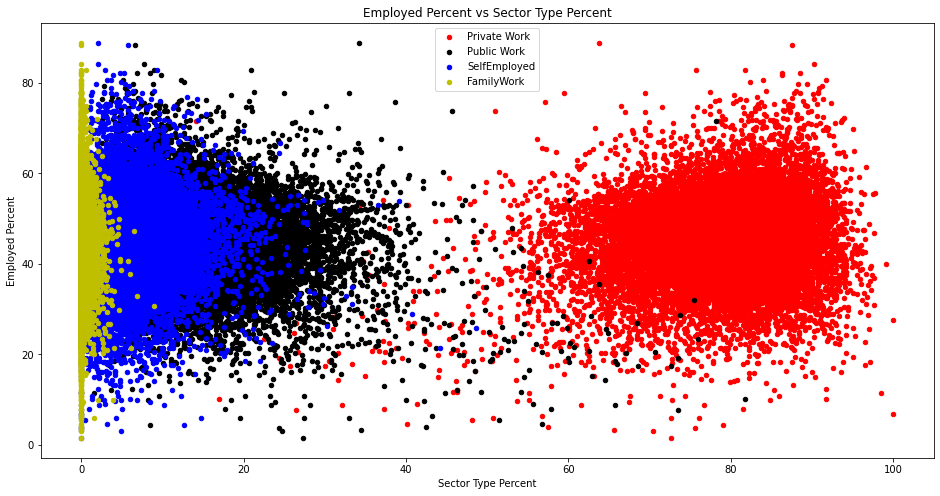

In [ ]:
ax1 = census_pc_sample.plot(kind='scatter', x='PrivateWork', y='EmployedPercent', color='r', title = 'Employed Percent vs Sector Type Percent', label = 'Private Work', figsize = (16,8))    
ax2 = census_pc_sample.plot(kind='scatter', x='PublicWork', y='EmployedPercent', color='k', ax=ax1, label = 'Public Work', figsize = (16,8))    
ax3 = census_pc_sample.plot(kind='scatter', x='SelfEmployed', y='EmployedPercent', color='b', ax=ax1, label = 'SelfEmployed', figsize = (16,8))
ax4 = census_pc_sample.plot(kind='scatter', x='FamilyWork', y='EmployedPercent', color='y', ax=ax1, label = 'FamilyWork', figsize = (16,8))
ax1.set_xlabel("Sector Type Percent")
ax1.set_ylabel("Employed Percent")

print(ax1 == ax2 == ax3 == ax4)

###### **Sector v Unemployed Percent**

This scatter plot explores the relationship between each of our sector type variables and Unemployment Percent. Using unemployment Percent we get similar seperation to the chart using Employed Percent but as could be expected the majority of our observations are unemployemnt percent below 20%. Between the Unemployement Percent and Employment percent it would probably more advantageous to cluster using Employment percent.

True


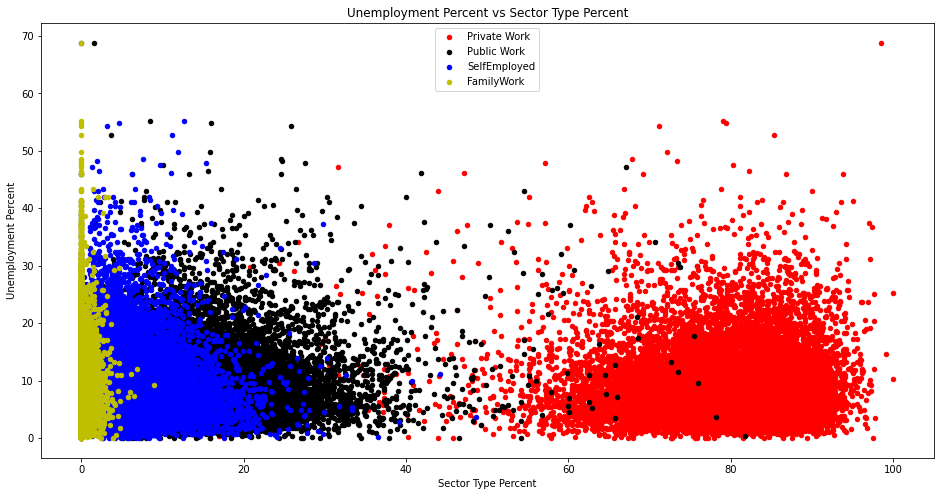

In [ ]:
ax1 = census_pc_sample.plot(kind='scatter', x='PrivateWork', y='Unemployment', color='r', title = 'Unemployment Percent vs Sector Type Percent', label = 'Private Work', figsize = (16,8))    
ax2 = census_pc_sample.plot(kind='scatter', x='PublicWork', y='Unemployment', color='k', ax=ax1, label = 'Public Work', figsize = (16,8))    
ax3 = census_pc_sample.plot(kind='scatter', x='SelfEmployed', y='Unemployment', color='b', ax=ax1, label = 'SelfEmployed', figsize = (16,8))
ax4 = census_pc_sample.plot(kind='scatter', x='FamilyWork', y='Unemployment', color='y', ax=ax1, label = 'FamilyWork', figsize = (16,8))
ax1.set_xlabel("Sector Type Percent")
ax1.set_ylabel("Unemployment Percent")

print(ax1 == ax2 == ax3 == ax4)

#### **2.2.3 3-D Visualizations**

For exceptional work we created 3-D plots of our data. The goal of the 3-D plots is to see if adding a third dimension to our visualizations uncovers distributions or data separation that would otherwise be difficult to see. Viewing our data in this way may give us some added insight into the clusters that different algorithms are identifying. The 3-D charts below show the distribution of employment percent by *PovertyClass* and also give the added dimension of percent of population by race. The poverty classes are leveled with 1 through 4 and can be interpreted as:
```
1 = Low
2 = Below Avg 
3 = Above Avg
4 = High
```

##### **2.2.3.1 Ethnicity: White** 

The first chart below is the percentage of employment percent by poverty class with the third axis showing the percentage of white people in the population. We don’t see any obvious separation of the data outside of poverty classes which is to be expected. Some distribution observations can be made viewing our data in 3-D. One of these observations is that unlike the charts for other races the distribution across all poverty classes is much more even distributed amongst the white population. Another observation that can be made is that higher concentrations of white people live in areas of low poverty and below average poverty This is almost the opposite distribution at low and below average poverty then the charts for other races.

Text(0.5, 0, 'White')

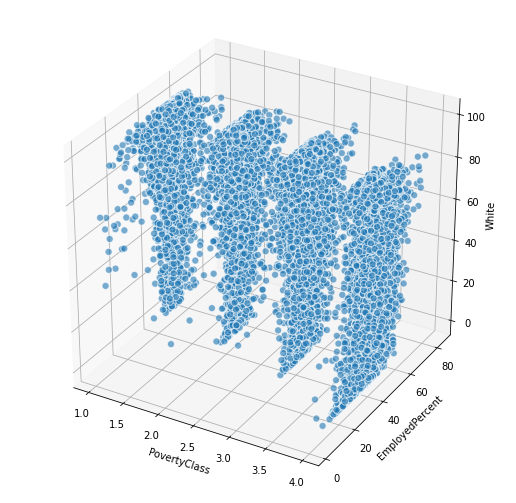

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib as mpl
import numpy as np
import seaborn as sns
%matplotlib inline

census_pc_sample = census_pc.sample(frac = .25)

# Visualizing 3-D numeric data with Scatter Plots
# length, breadth and depth

#White 
fig = plt.figure(figsize=(9, 9))
ax = fig.add_subplot(111, projection='3d')

xs = census_pc_sample['PovertyClass']
ys = census_pc_sample['EmployedPercent']
zs = census_pc_sample['White']
ax.scatter(xs, ys, zs, s=50, alpha=0.6, edgecolors='w')

ax.set_xlabel('PovertyClass')
ax.set_ylabel('EmployedPercent')
ax.set_zlabel('White')

##### **2.2.3.2 Ethnicity: Hispanic and Black**

The Hispanic and Black populations have very similar distributions of employment percent, poverty class, and percentage of population so we will look at them together. The Hispanic and black populations have a lower percentage of their population in low or below average poverty areas. Just like the white population the Hispanic and Black populations have the largest distributions of their populations in above average and high poverty areas.

Hispanic Population Plot:


Text(0.5, 0, 'Hispanic')

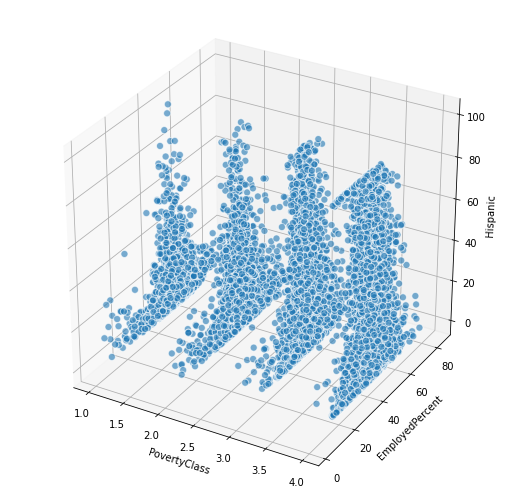

In [ ]:
#Hispanic

fig = plt.figure(figsize=(9, 9))
ax = fig.add_subplot(111, projection='3d')

xs = census_pc_sample['PovertyClass']
ys = census_pc_sample['EmployedPercent']
zs = census_pc_sample['Hispanic']
ax.scatter(xs, ys, zs, s=50, alpha=0.6, edgecolors='w')

ax.set_xlabel('PovertyClass')
ax.set_ylabel('EmployedPercent')
ax.set_zlabel('Hispanic')

Black Population Plot:

Text(0.5, 0, 'Black')

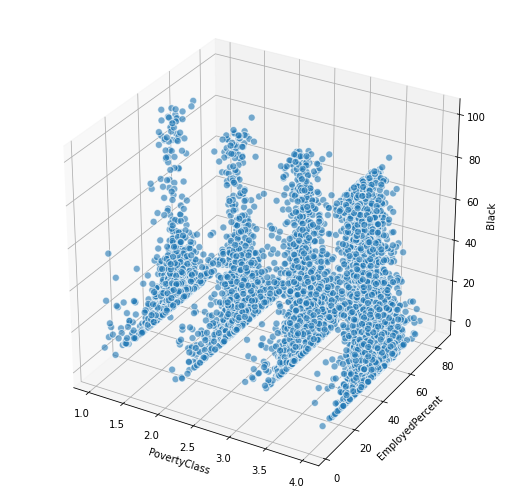

In [ ]:
#Black

fig = plt.figure(figsize=(9, 9))
ax = fig.add_subplot(111, projection='3d')

xs = census_pc_sample['PovertyClass']
ys = census_pc_sample['EmployedPercent']
zs = census_pc_sample['Black']
ax.scatter(xs, ys, zs, s=50, alpha=0.6, edgecolors='w')

ax.set_xlabel('PovertyClass')
ax.set_ylabel('EmployedPercent')
ax.set_zlabel('Black')

##### **2.2.3.3 Ethnicity: Asian**

The chart for the Asian population does not show any obvious separation outside of the previously identified separation between poverty classes. When looking at distribution within the poverty classes we see that Asian is a lower overall percentage of the population, however, higher concentrations of Asian people are in the low and below average poverty levels. This is the opposite of all the other races represented as the others have their highest concentration in above average and high poverty classes.


Asian Population Plot:

Text(0.5, 0, 'Asian')

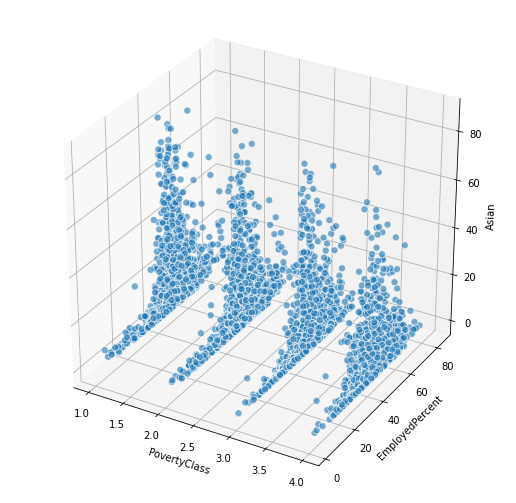

In [ ]:
#Asian

fig = plt.figure(figsize=(9, 9))
ax = fig.add_subplot(111, projection='3d')

xs = census_pc_sample['PovertyClass']
ys = census_pc_sample['EmployedPercent']
zs = census_pc_sample['Asian']
ax.scatter(xs, ys, zs, s=50, alpha=0.6, edgecolors='w')

ax.set_xlabel('PovertyClass')
ax.set_ylabel('EmployedPercent')
ax.set_zlabel('Asian')

##### **2.2.3.4 Ethnicity: Native and Pacific Islander**

Native American and Pacific Islanders are the smallest percentages of the population and have similar distributions so we will look at them together. The Native American population is slightly larger than Pacific Islander population. Some separation can be seen in the chart for Native American population in high poverty areas with 40-60% of the population being native. This separation may be something that our algorithms cluster on. The Pacific Islander population did not have an separation as obvious as the Native American population. Pacific Islanders seem to mainly be in middle class areas with Below Average and Above average poverty. 


Native American Population Plot:

Text(0.5, 0, 'Native')

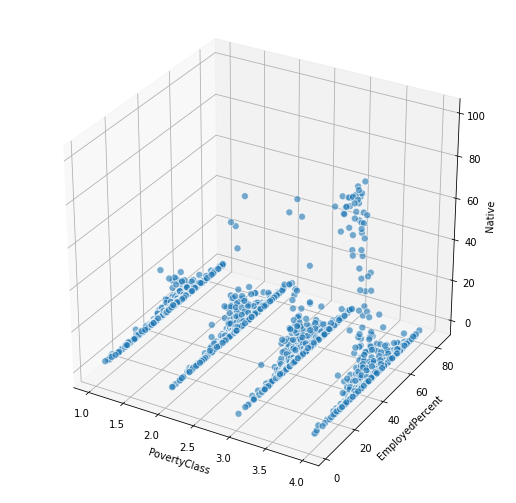

In [ ]:
#Native American

fig = plt.figure(figsize=(9, 9))
ax = fig.add_subplot(111, projection='3d')

xs = census_pc_sample['PovertyClass']
ys = census_pc_sample['EmployedPercent']
zs = census_pc_sample['Native']
ax.scatter(xs, ys, zs, s=50, alpha=0.6, edgecolors='w')

ax.set_xlabel('PovertyClass')
ax.set_ylabel('EmployedPercent')
ax.set_zlabel('Native')

Pacific Islander Population Plot:

Text(0.5, 0, 'Pacific')

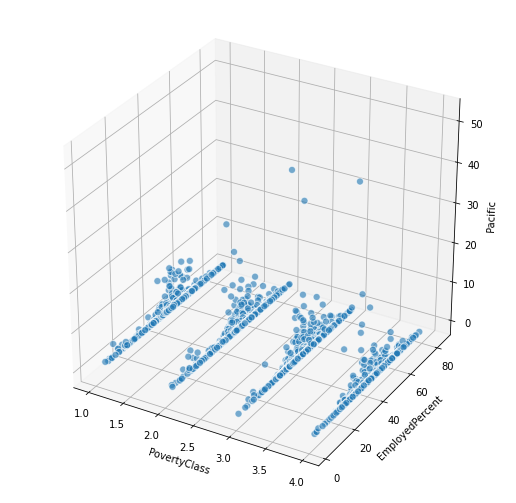

In [ ]:
#Pacific Islander

fig = plt.figure(figsize=(9, 9))
ax = fig.add_subplot(111, projection='3d')

xs = census_pc_sample['PovertyClass']
ys = census_pc_sample['EmployedPercent']
zs = census_pc_sample['Pacific']
ax.scatter(xs, ys, zs, s=50, alpha=0.6, edgecolors='w')

ax.set_xlabel('PovertyClass')
ax.set_ylabel('EmployedPercent')
ax.set_zlabel('Pacific')

## **3. Modeling and Evaluation**

Our ultimate goal is to produce a classification model that can classify geographical areas as a certain poverty level with the highest possible accuracy. For this lab, in addition to a classification model we cluster various feature subsets together according to separation and trending that we identified visualizations in the previous section. We use both K-Means and DBSCAN cluster algorithms. Using several combinations of feature subsets, we replace the features in those subsets with their discrete cluster labels and run our new classification model using these new discretized features. The goal is for us to identify clustered feature subsets that improve the accuracy over a baseline model without clustered feature subsets. 



### **3.1 Modeling and Evaluation 1: Training and Adjusting Parameters**

In this section we establish a baseline classification model accuracy without any clustered feature subsets in the model. We then proceed through several different combinations of feature subsets and using for loops adjust the parameters of our cluster algorithms (number of clusters for K-Means and EPS/Min Samples for DBSCAN) looking for the highest accuracy. 

#### **3.1.1 Baseline Classification Performance For Poverty Class**


Our baseline classification performance for Poverty Classes is the final model we generated in Lab 2. It is a Random Forest Classifier that achieves a 79.58% average accuracy. We will compare each of our classification models with clustered variables to this model with accuracy as the metric.

In [ ]:
%%time
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

if 'PovertyClass' in census_pc:
    y = census_pc['PovertyClass'].values # get the labels we want
    del census_pc['PovertyClass'] # get rid of the class label
    X = census_pc.values # use everything else to predict! 

# Scale the data
ss = StandardScaler()
X = ss.fit_transform(X)

num_cv_iterations = 10
cv = StratifiedKFold(n_splits = num_cv_iterations, shuffle = True, random_state = 13)

clf = RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=25, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, n_estimators=400,
                       n_jobs=None, oob_score=False, random_state=11, verbose=0,
                       warm_start=False)

acc = cross_val_score(clf,X,y,cv=cv)

print ("Average accuracy: ", acc.mean()*100, "+-", acc.std()*100, ", Minimum Accuracy: ", acc.min()*100)

Average accuracy:  79.57783218580174 +- 0.45980927158570395 , Minimum Accuracy:  78.93505778756192
CPU times: user 27min 25s, sys: 49.8 s, total: 28min 15s
Wall time: 28min 17s


#### **3.1.2 Cluster Analysis On census_pc Data Set**

We use four different clustered feature subsets in this analysis, one cluster per variable groups that we identified in section two (race, work type, transportation type, and sector type) clustered with another variable that we identified the separation and trending in our scatter plot visualization section. We clustered our race variables with *Unemployment*, work type variables with *IncomePerCap*, transportation type variables with *MeanCommute*, and sector type variables with *CitizenPercent*. 

Therefore our clusters are:

    Cluster 1 (X1): Hispanic, White, Black, Native, Asian, Pacific, and Unemployment

    Cluster 2 (X2): Professional, Service, Office, Construction, Production, and IncomePerCap

    Cluster 3 (X3): Drive, Carpool, Transit, Walk, OtherTransp, WorkAtHome, and MeanCommute 

    Cluster 4 (X4): PrivateWork, PublicWork, SelfEmployed, FamilyWork, and CitizenPercent 

In [ ]:
X1 = census_pc[['Hispanic', 'White', 'Black', 'Native', 'Asian', 'Pacific', 'Unemployment']]
X2 = census_pc[['Professional', 'Service', 'Office', 'Construction', 'Production', 'IncomePerCap']]
X3 = census_pc[['Drive', 'Carpool', 'Transit', 'Walk', 'OtherTransp', 'WorkAtHome', 'MeanCommute']]
X4 = census_pc[['PrivateWork', 'PublicWork', 'SelfEmployed', 'FamilyWork', 'CitizenPercent']]

**Race Variables Optimal Clustering Parameters**

K MEANS:

To get the optimal clustering parameters for our race cluster (X1) in a K-Means cluster algorithm, we will loop through different values of the number of clusters and see what generates the highest accuracy with our Random Forest Classifier. 

In [ ]:
%%time
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
import numpy as np
import pandas as pd

print("K MEANS:")
for n_clusters in range(3,16):
  
  cls_race = KMeans(n_clusters=n_clusters, init='k-means++',random_state=1)
  cls_race.fit(X1)
  newfeature_race = cls_race.labels_

  y = census_pc['PovertyClass']
  X = census_pc[['IncomePerCap', 'ChildPoverty', 'MeanCommute', 'EmployedPercent', 'CitizenPercent', 'Professional', 'Service', 'Office', 'Construction', 'Production', 'Drive', 'Transit', 'Walk', 'OtherTransp', 'WorkAtHome', 'PrivateWork', 'PublicWork', 'SelfEmployed', 'FamilyWork']]
  ss = StandardScaler()
  X = ss.fit_transform(X) 
  X = np.column_stack((X,pd.get_dummies(newfeature_race),))

  num_cv_iterations = 2
  cv = StratifiedKFold(n_splits = num_cv_iterations, shuffle = True, random_state = 13)
  clf = RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=25, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, n_estimators=400,
                       n_jobs=None, oob_score=False, random_state=11, verbose=0,
                       warm_start=False)

  acc = cross_val_score(clf,X,y=y,cv=cv)
  print ("KMEANS, Clusters:",n_clusters,", Average accuracy: ", acc.mean()*100, "+-", acc.std()*100, ", Minimum Accuracy: ", acc.min()*100, ", Maximum Accuracy: ", acc.max()*100)

K MEANS:
KMEANS, Clusters: 3 , Average accuracy:  79.22830654999464 +- 0.2652946609589757 , Minimum Accuracy:  78.96301188903567 , Maximum Accuracy:  79.49360121095363
KMEANS, Clusters: 4 , Average accuracy:  79.17601650682342 +- 0.29556736547600715 , Minimum Accuracy:  78.88044914134741 , Maximum Accuracy:  79.47158387229943
KMEANS, Clusters: 5 , Average accuracy:  79.20353511258345 +- 0.10016655247777617 , Minimum Accuracy:  79.10336856010568 , Maximum Accuracy:  79.30370166506123
KMEANS, Clusters: 6 , Average accuracy:  79.34664785170678 +- 0.2460313831907035 , Minimum Accuracy:  79.10061646851607 , Maximum Accuracy:  79.59267923489747
KMEANS, Clusters: 7 , Average accuracy:  79.33426355316679 +- 0.26667218372601886 , Minimum Accuracy:  79.06759136944078 , Maximum Accuracy:  79.60093573689281
KMEANS, Clusters: 8 , Average accuracy:  79.24894772924078 +- 0.28043165702590356 , Minimum Accuracy:  78.96851607221488 , Maximum Accuracy:  79.52937938626668
KMEANS, Clusters: 9 , Average acc

All accuracy values are fairly similiar regardless of the parameter values. However, we achieve the highest accuracy with n_clusters = 6.

DBSCAN:

To get the optimal clustering parameters for our race cluster (X1) in a DBSCAN cluster algorithm, we will loop through different values of EPS and Min-Samples and see what generates the highest accuracy with our Random Forest Classifier. 

In [ ]:
%%time
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
import numpy as np
import pandas as pd

print("DBSCAN:")
for eps in [.5, 1, 5, 10, 15]:
    for mpts in [25, 50, 75]:

        cls_race = DBSCAN(eps=eps, min_samples=mpts)
        cls_race.fit(X1)
        newfeature_race = cls_race.labels_

        y = census_pc['PovertyClass']
        X = census_pc[['IncomePerCap', 'ChildPoverty', 'MeanCommute', 'EmployedPercent', 'CitizenPercent', 'Professional', 'Service', 'Office', 'Construction', 'Production', 'Drive', 'Transit', 'Walk', 'OtherTransp', 'WorkAtHome', 'PrivateWork', 'PublicWork', 'SelfEmployed', 'FamilyWork']]
        ss = StandardScaler()
        X = ss.fit_transform(X) 
        X = np.column_stack((X,pd.get_dummies(newfeature_race),))

        num_cv_iterations = 2
        cv = StratifiedKFold(n_splits = num_cv_iterations, shuffle = True, random_state = 13)
        clf = RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=25, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, n_estimators=400,
                       n_jobs=None, oob_score=False, random_state=11, verbose=0,
                       warm_start=False)

        acc = cross_val_score(clf,X,y=y,cv=cv)
        print ("DBSCAN, EPS:",eps,"Min Samples:", mpts,", Average accuracy = ", acc.mean()*100, "+-", acc.std()*100, ", Minimum Accuracy: ", acc.min()*100, ", Maximum Accuracy: ", acc.max()*100)

DBSCAN:
DBSCAN, EPS: 0.5 Min Samples: 25 , Average accuracy =  79.13748574759668 +- 0.2267635987635741 , Minimum Accuracy:  78.91072214883312 , Maximum Accuracy:  79.36424934636025
DBSCAN, EPS: 0.5 Min Samples: 50 , Average accuracy =  79.15537385060506 +- 0.17309732044213932 , Minimum Accuracy:  78.98227653016292 , Maximum Accuracy:  79.3284711710472
DBSCAN, EPS: 0.5 Min Samples: 75 , Average accuracy =  79.15537385060506 +- 0.17309732044213932 , Minimum Accuracy:  78.98227653016292 , Maximum Accuracy:  79.3284711710472
DBSCAN, EPS: 1 Min Samples: 25 , Average accuracy =  79.1553739642183 +- 0.1813537088242112 , Minimum Accuracy:  78.9740202553941 , Maximum Accuracy:  79.33672767304252
DBSCAN, EPS: 1 Min Samples: 50 , Average accuracy =  79.16500844343366 +- 0.328592767519964 , Minimum Accuracy:  78.8364156759137 , Maximum Accuracy:  79.49360121095363
DBSCAN, EPS: 1 Min Samples: 75 , Average accuracy =  79.22830628489706 +- 0.246029754734145 , Minimum Accuracy:  78.98227653016292 , Ma

All accuracy values are fairly similiar regardless of the parameter values. However, we achieve the highest accuracy with EPS = 1 and MPTS = 75.

We will set variables to these parameter values to use later in our analysis.

In [33]:
race_optimal_k_clusters = 6
race_optimal_DB_EPS = 1
race_optimal_DB_MPTS = 75

**Work Type Variables Optimal Clustering Parameters**

K MEANS:

To get the optimal clustering parameters for our work type cluster (X2) in a K-Means cluster algorithm, we will loop through different values of the number of clusters and see what generates the highest accuracy with our Random Forest Classifier. 

In [ ]:
%%time
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
import numpy as np
import pandas as pd

print("K MEANS:")
for n_clusters in range(3,16):
  
  cls_work = KMeans(n_clusters=n_clusters, init='k-means++',random_state=1)
  cls_work.fit(X2)
  newfeature_work = cls_work.labels_

  y = census_pc['PovertyClass']
  X = census_pc[['CitizenPercent', 'ChildPoverty', 'MeanCommute', 'EmployedPercent', 'Unemployment', 'Hispanic', 'White', 'Black', 'Native', 'Asian', 'Pacific', 'Drive', 'Transit', 'Walk', 'OtherTransp', 'WorkAtHome', 'PrivateWork', 'PublicWork', 'SelfEmployed', 'FamilyWork']]
  ss = StandardScaler()
  X = ss.fit_transform(X) 
  X = np.column_stack((X,pd.get_dummies(newfeature_work),))

  num_cv_iterations = 2
  cv = StratifiedKFold(n_splits = num_cv_iterations, shuffle = True, random_state = 13)
  clf = RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=25, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, n_estimators=400,
                       n_jobs=None, oob_score=False, random_state=11, verbose=0,
                       warm_start=False)

  acc = cross_val_score(clf,X,y=y,cv=cv)
  print ("KMEANS, Clusters:",n_clusters,", Average accuracy: ", acc.mean()*100, "+-", acc.std()*100, ", Minimum Accuracy: ", acc.min()*100, ", Maximum Accuracy: ", acc.max()*100)

K MEANS:
KMEANS, Clusters: 3 , Average accuracy:  78.13158456943032 +- 0.38224507141182973 , Minimum Accuracy:  77.7493394980185 , Maximum Accuracy:  78.51382964084216
KMEANS, Clusters: 4 , Average accuracy:  78.38753158675536 +- 0.3079410979838826 , Minimum Accuracy:  78.07959048877147 , Maximum Accuracy:  78.69547268473923
KMEANS, Clusters: 5 , Average accuracy:  78.58981425718416 +- 0.39188383005954175 , Minimum Accuracy:  78.19793042712462 , Maximum Accuracy:  78.9816980872437
KMEANS, Clusters: 6 , Average accuracy:  78.62008616640844 +- 0.28179906821381717 , Minimum Accuracy:  78.33828709819463 , Maximum Accuracy:  78.90188523462226
KMEANS, Clusters: 7 , Average accuracy:  78.67788156676245 +- 0.33133819379899676 , Minimum Accuracy:  78.34654337296345 , Maximum Accuracy:  79.00921976056145
KMEANS, Clusters: 8 , Average accuracy:  78.88153926046682 +- 0.33959738464119926 , Minimum Accuracy:  78.54194187582563 , Maximum Accuracy:  79.22113664510803
KMEANS, Clusters: 9 , Average accu

All accuracy values are fairly similiar regardless of the parameter values. However, we achieve the highest accuracy with n_clusters = 8.

DBSCAN:

To get the optimal clustering parameters for our work type cluster (X2) in a DBSCAN cluster algorithm, we will loop through different values of EPS and Min-Samples and see what generates the highest accuracy with our Random Forest Classifier. 

In [ ]:
%%time
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
import numpy as np
import pandas as pd

print("DBSCAN:")
for eps in [.5, 1, 5, 10, 15]:
    for mpts in [25, 50, 75]:

        cls_work = DBSCAN(eps=eps, min_samples=mpts)
        cls_work.fit(X2)
        newfeature_work = cls_work.labels_

        y = census_pc['PovertyClass']
        X = census_pc[['CitizenPercent', 'ChildPoverty', 'MeanCommute', 'EmployedPercent', 'Unemployment', 'Hispanic', 'White', 'Black', 'Native', 'Asian', 'Pacific', 'Drive', 'Transit', 'Walk', 'OtherTransp', 'WorkAtHome', 'PrivateWork', 'PublicWork', 'SelfEmployed', 'FamilyWork']]
        ss = StandardScaler()
        X = ss.fit_transform(X) 
        X = np.column_stack((X,pd.get_dummies(newfeature_work),))

        num_cv_iterations = 2
        cv = StratifiedKFold(n_splits = num_cv_iterations, shuffle = True, random_state = 13)
        clf = RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=25, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, n_estimators=400,
                       n_jobs=None, oob_score=False, random_state=11, verbose=0,
                       warm_start=False)

        acc = cross_val_score(clf,X,y=y,cv=cv)
        print ("DBSCAN, EPS:",eps,"Min Samples:", mpts,", Average accuracy = ", acc.mean()*100, "+-", acc.std()*100, ", Minimum Accuracy: ", acc.min()*100, ", Maximum Accuracy: ", acc.max()*100)

DBSCAN:
DBSCAN, EPS: 0.5 Min Samples: 25 , Average accuracy =  77.73802979145394 +- 0.3629747496221525 , Minimum Accuracy:  77.3750550418318 , Maximum Accuracy:  78.10100454107611
DBSCAN, EPS: 0.5 Min Samples: 50 , Average accuracy =  77.73802979145394 +- 0.3629747496221525 , Minimum Accuracy:  77.3750550418318 , Maximum Accuracy:  78.10100454107611
DBSCAN, EPS: 0.5 Min Samples: 75 , Average accuracy =  77.73802979145394 +- 0.3629747496221525 , Minimum Accuracy:  77.3750550418318 , Maximum Accuracy:  78.10100454107611
DBSCAN, EPS: 1 Min Samples: 25 , Average accuracy =  77.73802979145394 +- 0.3629747496221525 , Minimum Accuracy:  77.3750550418318 , Maximum Accuracy:  78.10100454107611
DBSCAN, EPS: 1 Min Samples: 50 , Average accuracy =  77.73802979145394 +- 0.3629747496221525 , Minimum Accuracy:  77.3750550418318 , Maximum Accuracy:  78.10100454107611
DBSCAN, EPS: 1 Min Samples: 75 , Average accuracy =  77.73802979145394 +- 0.3629747496221525 , Minimum Accuracy:  77.3750550418318 , Max

All accuracy values are fairly similiar regardless of the parameter values. However, we achieve the highest accuracy with EPS = 5 and MPTS = 25.

We will set variables to these parameter values to use later in our analysis.

In [37]:
work_optimal_k_clusters = 8
work_optimal_DB_EPS = 5
work_optimal_DB_MPTS = 25

**Transport Type Variables Optimal Clustering Parameters**



K MEANS:

To get the optimal clustering parameters for our transport type cluster (X3) in a K-Means cluster algorithm, we will loop through different values of the number of clusters and see what generates the highest accuracy with our Random Forest Classifier. 

In [ ]:
%%time
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
import numpy as np
import pandas as pd

print("K MEANS:")
for n_clusters in range(3,16):
  
  cls_transport = KMeans(n_clusters=n_clusters, init='k-means++',random_state=1)
  cls_transport.fit(X3)
  newfeature_transport = cls_transport.labels_

  y = census_pc['PovertyClass']
  X = census_pc[['IncomePerCap', 'ChildPoverty', 'CitizenPercent', 'EmployedPercent', 'Unemployment', 'Hispanic', 'White', 'Black', 'Native', 'Asian', 'Pacific', 'Professional', 'Service', 'Office', 'Construction', 'Production', 'PrivateWork', 'PublicWork', 'SelfEmployed', 'FamilyWork']]
  ss = StandardScaler()
  X = ss.fit_transform(X) 
  X = np.column_stack((X,pd.get_dummies(newfeature_transport),))

  num_cv_iterations = 2
  cv = StratifiedKFold(n_splits = num_cv_iterations, shuffle = True, random_state = 13)
  clf = RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=25, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, n_estimators=400,
                       n_jobs=None, oob_score=False, random_state=11, verbose=0,
                       warm_start=False)

  acc = cross_val_score(clf,X,y=y,cv=cv)
  print ("KMEANS, Clusters:",n_clusters,", Average accuracy: ", acc.mean()*100, "+-", acc.std()*100, ", Minimum Accuracy: ", acc.min()*100, ", Maximum Accuracy: ", acc.max()*100)

K MEANS:
KMEANS, Clusters: 3 , Average accuracy:  78.94483702618807 +- 0.2515301129339953 , Minimum Accuracy:  78.69330691325406 , Maximum Accuracy:  79.19636713912206
KMEANS, Clusters: 4 , Average accuracy:  78.7604445038061 +- 0.26253609341420625 , Minimum Accuracy:  78.4979084103919 , Maximum Accuracy:  79.02298059722031
KMEANS, Clusters: 5 , Average accuracy:  78.94758767867653 +- 0.14419710183812828 , Minimum Accuracy:  78.8033905768384 , Maximum Accuracy:  79.09178478051466
KMEANS, Clusters: 6 , Average accuracy:  78.93382737221282 +- 0.16896607762892923 , Minimum Accuracy:  78.76486129458388 , Maximum Accuracy:  79.10279344984174
KMEANS, Clusters: 7 , Average accuracy:  78.9283234162601 +- 0.1909830375722954 , Minimum Accuracy:  78.7373403786878 , Maximum Accuracy:  79.1193064538324
KMEANS, Clusters: 8 , Average accuracy:  78.97235657872517 +- 0.12493253645303737 , Minimum Accuracy:  78.84742404227212 , Maximum Accuracy:  79.0972891151782
KMEANS, Clusters: 9 , Average accuracy: 

All accuracy values are fairly similiar regardless of the parameter values. However, we achieve the highest accuracy with n_clusters = 8.

DBSCAN:

To get the optimal clustering parameters for our transport type cluster (X3) in a DBSCAN cluster algorithm, we will loop through different values of EPS and Min-Samples and see what generates the highest accuracy with our Random Forest Classifier. 

In [ ]:
%%time
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
import numpy as np
import pandas as pd

print("DBSCAN:")
for eps in [.5, 1, 5, 10]:
    for mpts in [25, 50, 75]:

        cls_transport = DBSCAN(eps=eps, min_samples=mpts)
        cls_transport.fit(X3)
        newfeature_transport = cls_transport.labels_

        y = census_pc['PovertyClass']
        X = census_pc[['IncomePerCap', 'ChildPoverty', 'CitizenPercent', 'EmployedPercent', 'Unemployment', 'Hispanic', 'White', 'Black', 'Native', 'Asian', 'Pacific', 'Professional', 'Service', 'Office', 'Construction', 'Production', 'PrivateWork', 'PublicWork', 'SelfEmployed', 'FamilyWork']]
        ss = StandardScaler()
        X = ss.fit_transform(X) 
        X = np.column_stack((X,pd.get_dummies(newfeature_transport),))

        num_cv_iterations = 2
        cv = StratifiedKFold(n_splits = num_cv_iterations, shuffle = True, random_state = 13)
        clf = RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=25, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, n_estimators=400,
                       n_jobs=None, oob_score=False, random_state=11, verbose=0,
                       warm_start=False)

        acc = cross_val_score(clf,X,y=y,cv=cv)
        print ("DBSCAN, EPS:",eps,"Min Samples:", mpts,", Average accuracy = ", acc.mean()*100, "+-", acc.std()*100, ", Minimum Accuracy: ", acc.min()*100, ", Maximum Accuracy: ", acc.max()*100)

DBSCAN:
DBSCAN, EPS: 0.5 Min Samples: 25 , Average accuracy =  78.72191340373962 +- 0.16896316155555202 , Minimum Accuracy:  78.55295024218407 , Maximum Accuracy:  78.89087656529516
DBSCAN, EPS: 0.5 Min Samples: 50 , Average accuracy =  78.72191340373962 +- 0.16896316155555202 , Minimum Accuracy:  78.55295024218407 , Maximum Accuracy:  78.89087656529516
DBSCAN, EPS: 0.5 Min Samples: 75 , Average accuracy =  78.72191340373962 +- 0.16896316155555202 , Minimum Accuracy:  78.55295024218407 , Maximum Accuracy:  78.89087656529516
DBSCAN, EPS: 1 Min Samples: 25 , Average accuracy =  78.72191340373962 +- 0.16896316155555202 , Minimum Accuracy:  78.55295024218407 , Maximum Accuracy:  78.89087656529516
DBSCAN, EPS: 1 Min Samples: 50 , Average accuracy =  78.72191340373962 +- 0.16896316155555202 , Minimum Accuracy:  78.55295024218407 , Maximum Accuracy:  78.89087656529516
DBSCAN, EPS: 1 Min Samples: 75 , Average accuracy =  78.72191340373962 +- 0.16896316155555202 , Minimum Accuracy:  78.55295024

All accuracy values are fairly similiar regardless of the parameter values. However, we achieve the highest accuracy with EPS = 5 and MPTS = 25.

We will set variables to these parameter values to use later in our analysis.

In [36]:
transport_optimal_k_clusters = 8
transport_optimal_DB_EPS = 5
transport_optimal_DB_MPTS = 25

**Sector Type Variables Optimal Clustering Parameters**

K MEANS:

To get the optimal clustering parameters for our sector type cluster (X4) in a K-Means cluster algorithm, we will loop through different values of the number of clusters and see what generates the highest accuracy with our Random Forest Classifier. 

In [ ]:
%%time
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
import numpy as np
import pandas as pd

print("K MEANS:")
for n_clusters in range(3,16):
  
  cls_sector = KMeans(n_clusters=n_clusters, init='k-means++',random_state=1)
  cls_sector.fit(X4)
  newfeature_sector = cls_sector.labels_

  y = census_pc['PovertyClass']
  X = census_pc[['IncomePerCap', 'ChildPoverty', 'MeanCommute', 'EmployedPercent', 'Unemployment', 'Hispanic', 'White', 'Black', 'Native', 'Asian', 'Pacific', 'Professional', 'Service', 'Office', 'Construction', 'Production', 'Drive', 'Transit', 'Walk', 'OtherTransp', 'WorkAtHome']]
  ss = StandardScaler()
  X = ss.fit_transform(X) 
  X = np.column_stack((X,pd.get_dummies(newfeature_sector),))

  num_cv_iterations = 2
  cv = StratifiedKFold(n_splits = num_cv_iterations, shuffle = True, random_state = 13)
  clf = RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=25, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, n_estimators=400,
                       n_jobs=None, oob_score=False, random_state=11, verbose=0,
                       warm_start=False)

  acc = cross_val_score(clf,X,y=y,cv=cv)
  print ("KMEANS, Clusters:",n_clusters,", Average accuracy: ", acc.mean()*100, "+-", acc.std()*100, ", Minimum Accuracy: ", acc.min()*100, ", Maximum Accuracy: ", acc.max()*100)

K MEANS:
KMEANS, Clusters: 3 , Average accuracy:  79.10858871016364 +- 0.2501563015330721 , Minimum Accuracy:  78.85843240863056 , Maximum Accuracy:  79.35874501169671
KMEANS, Clusters: 4 , Average accuracy:  79.1856493954533 +- 0.32721698682273703 , Minimum Accuracy:  78.85843240863056 , Maximum Accuracy:  79.51286638227603
KMEANS, Clusters: 5 , Average accuracy:  79.17876727292514 +- 0.19649074276221756 , Minimum Accuracy:  78.98227653016292 , Maximum Accuracy:  79.37525801568735
KMEANS, Clusters: 6 , Average accuracy:  79.2365640745092 +- 0.3478586583929577 , Minimum Accuracy:  78.88870541611624 , Maximum Accuracy:  79.58442273290215
KMEANS, Clusters: 7 , Average accuracy:  79.18014506078976 +- 0.32171265215918954 , Minimum Accuracy:  78.85843240863056 , Maximum Accuracy:  79.50185771294895
KMEANS, Clusters: 8 , Average accuracy:  79.16225479912966 +- 0.218507551221242 , Minimum Accuracy:  78.94374724790842 , Maximum Accuracy:  79.38076235035089
KMEANS, Clusters: 9 , Average accurac

All accuracy values are fairly similiar regardless of the parameter values. However, we achieve the highest accuracy with n_clusters = 6.

DBSCAN:

To get the optimal clustering parameters for our sector type cluster (X4) in a DBSCAN cluster algorithm, we will loop through different values of EPS and Min-Samples and see what generates the highest accuracy with our Random Forest Classifier. 

In [ ]:
%%time
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
import numpy as np
import pandas as pd

print("DBSCAN:")
for eps in [.5, 1, 5, 10, 15]:
    for mpts in [25, 50, 75]:

        cls_sector = DBSCAN(eps=eps, min_samples=mpts)
        cls_sector.fit(X4)
        newfeature_sector = cls_sector.labels_

        y = census_pc['PovertyClass']
        X = census_pc[['IncomePerCap', 'ChildPoverty', 'MeanCommute', 'EmployedPercent', 'Unemployment', 'Hispanic', 'White', 'Black', 'Native', 'Asian', 'Pacific', 'Professional', 'Service', 'Office', 'Construction', 'Production', 'Drive', 'Transit', 'Walk', 'OtherTransp', 'WorkAtHome']]
        ss = StandardScaler()
        X = ss.fit_transform(X) 
        X = np.column_stack((X,pd.get_dummies(newfeature_sector),))

        num_cv_iterations = 2
        cv = StratifiedKFold(n_splits = num_cv_iterations, shuffle = True, random_state = 13)
        clf = RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=25, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, n_estimators=400,
                       n_jobs=None, oob_score=False, random_state=11, verbose=0,
                       warm_start=False)

        acc = cross_val_score(clf,X,y=y,cv=cv)
        print ("DBSCAN, EPS:",eps,"Min Samples:", mpts,", Average accuracy = ", acc.mean()*100, "+-", acc.std()*100, ", Minimum Accuracy: ", acc.min()*100, ", Maximum Accuracy: ", acc.max()*100)

DBSCAN:
DBSCAN, EPS: 0.5 Min Samples: 25 , Average accuracy =  79.13748760327974 +- 0.3616179423374277 , Minimum Accuracy:  78.77586966094232 , Maximum Accuracy:  79.49910554561718
DBSCAN, EPS: 0.5 Min Samples: 50 , Average accuracy =  79.13748760327974 +- 0.3616179423374277 , Minimum Accuracy:  78.77586966094232 , Maximum Accuracy:  79.49910554561718
DBSCAN, EPS: 0.5 Min Samples: 75 , Average accuracy =  79.13748760327974 +- 0.3616179423374277 , Minimum Accuracy:  78.77586966094232 , Maximum Accuracy:  79.49910554561718
DBSCAN, EPS: 1 Min Samples: 25 , Average accuracy =  78.96823109231656 +- 0.3217097360858179 , Minimum Accuracy:  78.64652135623074 , Maximum Accuracy:  79.28994082840237
DBSCAN, EPS: 1 Min Samples: 50 , Average accuracy =  79.10858980842504 +- 0.32996805589311506 , Minimum Accuracy:  78.77862175253192 , Maximum Accuracy:  79.43855786431814
DBSCAN, EPS: 1 Min Samples: 75 , Average accuracy =  79.22142628314954 +- 0.2694227604723043 , Minimum Accuracy:  78.9520035226772

All accuracy values are fairly similiar regardless of the parameter valeus. However, we achieve the highest accuracy with EPS = 5 and MPTS = 75.

We will set variables to these parameter values to use later in our analysis.

In [35]:
sector_optimal_k_clusters = 6
sector_optimal_DB_EPS = 5
sector_optimal_DB_MPTS = 75

### **3.2 Modeling and Evaluation 2: Evaluate and Compare Results**

To further evaluate our cluster analysis we combine each of our four clusters together and run our Random Forest Classifier. We use the optimal k_clusters for each cluster in the combined K-Means algorithm and the optimal EPS/Min-Points for each cluster in the DBSCAN algorithm. 

**Combining All 4 Clusters**

K MEANS:

In [ ]:
%%time
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
import numpy as np
import pandas as pd

# get the first clustering
cls_race = KMeans(n_clusters=race_optimal_k_clusters, init='k-means++',random_state=1)
cls_race.fit(X1)
newfeature_race = cls_race.labels_ 

# append on the second clustering
cls_work = KMeans(n_clusters=work_optimal_k_clusters, init='k-means++',random_state=1)
cls_work.fit(X2)
newfeature_work = cls_work.labels_ 

# append on the third clustering
cls_transport = KMeans(n_clusters=transport_optimal_k_clusters, init='k-means++',random_state=1)
cls_transport.fit(X3)
newfeature_transport = cls_transport.labels_ 

# append on the fourth clustering
cls_sector = KMeans(n_clusters=sector_optimal_k_clusters, init='k-means++',random_state=1)
cls_sector.fit(X4)
newfeature_sector = cls_sector.labels_ 

y = census_pc['PovertyClass']
X = census_pc[['ChildPoverty']]
ss = StandardScaler()
X = ss.fit_transform(X) 
X = np.column_stack((X,pd.get_dummies(newfeature_race),pd.get_dummies(newfeature_work), pd.get_dummies(newfeature_transport), pd.get_dummies(newfeature_sector)))

num_cv_iterations = 10
cv = StratifiedKFold(n_splits = num_cv_iterations, shuffle = True, random_state = 13)


clf = RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=25, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, n_estimators=400,
                       n_jobs=None, oob_score=False, random_state=11, verbose=0,
                       warm_start=False)

acc = cross_val_score(clf,X,y=y,cv=cv)

print ("K Means: Average accuracy = ", acc.mean()*100, "+-", acc.std()*100, ", Minimum Accuracy: ", acc.min()*100, ", Maximum Accuracy: ", acc.max()*100)

K Means: Average accuracy =  73.5038734823982 +- 0.434259127588924 , Minimum Accuracy:  72.43704417228567 , Maximum Accuracy:  74.07458373469107
CPU times: user 6min 16s, sys: 1min 12s, total: 7min 28s
Wall time: 7min 22s


DBSCAN:

In [ ]:
%%time
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
import numpy as np
import pandas as pd

# get the first clustering
cls_race = DBSCAN(eps=race_optimal_DB_EPS, min_samples=race_optimal_DB_MPTS)
cls_race.fit(X1)
newfeature_race = cls_race.labels_

# append on the second clustering
cls_work = DBSCAN(eps=work_optimal_DB_EPS, min_samples=work_optimal_DB_MPTS)
cls_work.fit(X2)
newfeature_work = cls_work.labels_

# append on the third clustering
cls_transport = DBSCAN(eps=transport_optimal_DB_EPS, min_samples=transport_optimal_DB_MPTS)
cls_transport.fit(X3)
newfeature_transport = cls_transport.labels_ 

# append on the fourth clustering
cls_sector = DBSCAN(eps=sector_optimal_DB_EPS, min_samples=sector_optimal_DB_MPTS)
cls_sector.fit(X4)
newfeature_sector = cls_sector.labels_

y = census_pc['PovertyClass']
X = census_pc[['ChildPoverty']]
ss = StandardScaler()
X = ss.fit_transform(X) 
X = np.column_stack((X,pd.get_dummies(newfeature_race),pd.get_dummies(newfeature_work), pd.get_dummies(newfeature_transport), pd.get_dummies(newfeature_sector)))

num_cv_iterations = 10
cv = StratifiedKFold(n_splits = num_cv_iterations, shuffle = True, random_state = 13)
clf = RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=25, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, n_estimators=400,
                       n_jobs=None, oob_score=False, random_state=11, verbose=0,
                       warm_start=False)

acc = cross_val_score(clf,X,y=y,cv=cv)

print ("DBSCAN: Average accuracy = ", acc.mean()*100, "+-", acc.std()*100, ", Minimum Accuracy: ", acc.min()*100, ", Maximum Accuracy: ", acc.max()*100)

DBSCAN: Average accuracy =  72.67410203724756 +- 0.42624211493941333 , Minimum Accuracy:  72.05174074583735 , Maximum Accuracy:  73.38654190174762
CPU times: user 4min 27s, sys: 1.94 s, total: 4min 29s
Wall time: 4min 30s


**Model Results and Comparison:**

Baseline Classification Model Average Accuracy: 79.58%

Cluster Average Accuracies:

|  Cluster                   |   K-Means   |   DBSCAN   |
|----------------------------|-------------|------------|
|  Race Only                 |79.35%       |79.23%.     |
|  Work Type Only            |78.88%       |77.74%      |
|  Transportation Type Only  |78.97%       |78.97%      |
|  Sector Type Only          |79.24%       |79.22%      |
|  All 4 Clusters  Combined  |73.50%       |72.67%      |

### **3.3 Modeling and Evaluation 3: Visualize Results**

Based on our optimal parameters generated in the previous section we visualize the results of different clusters in this section. First we will reload our clusters.

In [ ]:
X1 = census_pc[['Hispanic', 'White', 'Black', 'Native', 'Asian', 'Pacific', 'Unemployment']]
X2 = census_pc[['Professional', 'Service', 'Office', 'Construction', 'Production', 'IncomePerCap']]
X3 = census_pc[['Drive', 'Carpool', 'Transit', 'Walk', 'OtherTransp', 'WorkAtHome', 'MeanCommute']]
X4 = census_pc[['PrivateWork', 'PublicWork', 'SelfEmployed', 'FamilyWork', 'CitizenPercent']]

This visualization shows the race cluster output for the White race variable and Unemployment. The K-Means algorithm chose 6 clusters as the optimal value for achieving the highest accuracy. 

CPU times: user 2.48 s, sys: 1.2 s, total: 3.68 s
Wall time: 2.25 s


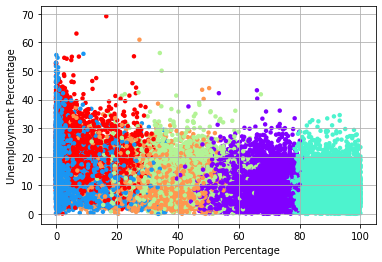

In [ ]:
%%time
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd

X1 = census_pc[['Hispanic', 'White', 'Black', 'Native', 'Asian', 'Pacific', 'Unemployment']]

data = X1

cls_race = KMeans(n_clusters=race_optimal_k_clusters, init='k-means++',random_state=1)
cls_race.fit(X1)
newfeature_race = cls_race.labels_

X1=X1.values
plt.figure()
plt.scatter(X1[:, 1], X1[:, 6]+np.random.random(X1[:, 0].shape)/2, c=newfeature_race, cmap=plt.cm.rainbow, s=20, linewidths=0)
plt.xlabel('White Population Percentage'), plt.ylabel('Unemployment Percentage')
plt.grid()

This visualization shows the race cluster output for the White race variable and Unemployment. The DBSCAN algorithm chose an EPS of 1 and MPTS of 75 as the optimal values for achieving the highest accuracy. We can see that this generates only two clusters.

CPU times: user 3.39 s, sys: 0 ns, total: 3.39 s
Wall time: 3.39 s


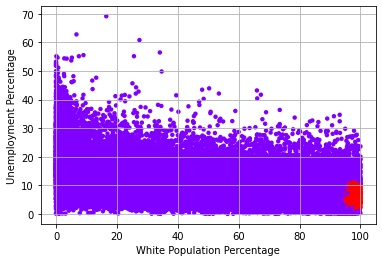

In [ ]:
%%time
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd

X1 = census_pc[['Hispanic', 'White', 'Black', 'Native', 'Asian', 'Pacific', 'Unemployment']]

data = X1

cls_race = DBSCAN(eps=race_optimal_DB_EPS, min_samples=race_optimal_DB_MPTS)
cls_race.fit(X1)
newfeature_race = cls_race.labels_

X1=X1.values
plt.figure()
plt.scatter(X1[:, 1], X1[:, 6]+np.random.random(X1[:, 0].shape)/2, c=newfeature_race, cmap=plt.cm.rainbow, s=20, linewidths=0)
plt.xlabel('White Population Percentage'), plt.ylabel('Unemployment Percentage')
plt.grid()

This visualization shows the work type cluster output for the Service work type variable and Income Per Cap. The K-Means algorithm chose 8 clusters as the optimal value for achieving the highest accuracy. We can see the different income levels as the clusters, regardless of the service type percentage.

CPU times: user 3.97 s, sys: 1.28 s, total: 5.25 s
Wall time: 3.74 s


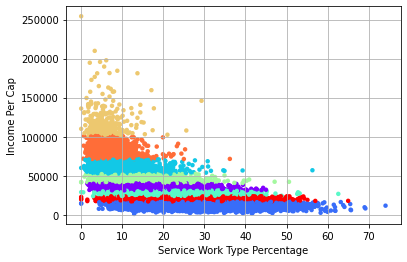

In [ ]:
%%time
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd

X2 = census_pc[['Professional', 'Service', 'Office', 'Construction', 'Production', 'IncomePerCap']]

data = X2

cls_work = KMeans(n_clusters=work_optimal_k_clusters, init='k-means++',random_state=1)
cls_work.fit(X2)
newfeature_work = cls_work.labels_

X2=X2.values
plt.figure()
plt.scatter(X2[:, 1], X2[:, 5]+np.random.random(X2[:, 0].shape)/2, c=newfeature_work, cmap=plt.cm.rainbow, s=20, linewidths=0)
plt.xlabel('Service Work Type Percentage'), plt.ylabel('Income Per Cap')
plt.grid()

This visualization shows the work type cluster output for the Service work type variable and Income Per Cap. The DBSCAN algorithm chose an EPS of 1 and MPTS of 75 as the optimal values for achieving the highest accuracy. It looks like it only generates one cluster.

CPU times: user 845 ms, sys: 2.86 ms, total: 848 ms
Wall time: 851 ms


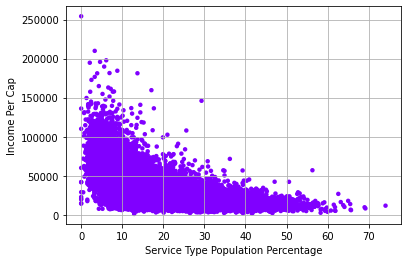

In [ ]:
%%time
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd

X2 = census_pc[['Professional', 'Service', 'Office', 'Construction', 'Production', 'IncomePerCap']]

data = X2

cls_work = DBSCAN(eps=work_optimal_DB_EPS, min_samples=work_optimal_DB_MPTS)
cls_work.fit(X2)
newfeature_work = cls_work.labels_

X2=X2.values
plt.figure()
plt.scatter(X2[:, 1], X2[:, 5]+np.random.random(X2[:, 0].shape)/2, c=newfeature_work, cmap=plt.cm.rainbow, s=20, linewidths=0)
plt.xlabel('Service Type Population Percentage'), plt.ylabel('Income Per Cap')
plt.grid()

#### **3.3.1 Additional Feature Engineering**

To try and gain additional insight we will perform the same analysis but engineer each of our grouped variables together into one variable based on which variable has the highest deviation from the national average. Therefore, this will turn into a catagorical variable. We will still cluster each group with the same one-off variables. We will see if this can increase the accuracy. 

In [46]:
census_pc_agg = census_pc.copy()
census_pc_agg.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 72671 entries, 0 to 74000
Data columns (total 28 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   Hispanic         72671 non-null  float64 
 1   White            72671 non-null  float64 
 2   Black            72671 non-null  float64 
 3   Native           72671 non-null  float64 
 4   Asian            72671 non-null  float64 
 5   Pacific          72671 non-null  float64 
 6   IncomePerCap     72671 non-null  float64 
 7   CitizenPercent   72671 non-null  float64 
 8   ChildPoverty     72671 non-null  float64 
 9   Professional     72671 non-null  float64 
 10  Service          72671 non-null  float64 
 11  Office           72671 non-null  float64 
 12  Construction     72671 non-null  float64 
 13  Production       72671 non-null  float64 
 14  Drive            72671 non-null  float64 
 15  Carpool          72671 non-null  float64 
 16  Transit          72671 non-null  float64

In [47]:
print('Mean White Percentage Across All Census Tracts', round(census_pc_agg['White'].mean(), 2), '%')
print('Mean Hispanic Percentage Across All Census Tracts', round(census_pc_agg['Hispanic'].mean(), 2), '%')
print('Mean Black Percentage Across All Census Tracts', round(census_pc_agg['Black'].mean(), 2), '%')
print('Mean Asian Percentage Across All Census Tracts', round(census_pc_agg['Asian'].mean(), 2), '%')
print('Mean Native Percentage Across All Census Tracts', round(census_pc_agg['Native'].mean(), 2), '%')
print('Mean Pacific Percentage Across All Census Tracts', round(census_pc_agg['Pacific'].mean(), 2), '%')

Mean White Percentage Across All Census Tracts 62.06 %
Mean Hispanic Percentage Across All Census Tracts 16.88 %
Mean Black Percentage Across All Census Tracts 13.24 %
Mean Asian Percentage Across All Census Tracts 4.59 %
Mean Native Percentage Across All Census Tracts 0.72 %
Mean Pacific Percentage Across All Census Tracts 0.14 %


In [18]:
Race = ''
census_pc_agg.insert(1,'Race',Race)

In [19]:
for i, row in census_pc_agg.iterrows():
    h_t = census_pc_agg.at[i,'Hispanic']
    h_m = census_pc_agg['Hispanic'].mean()
    h_d = (h_t - h_m)/h_m
    w_t = census_pc_agg.at[i,'White']
    w_m = census_pc_agg['White'].mean()
    w_d = (w_t - w_m)/w_m
    b_t = census_pc_agg.at[i,'Black']
    b_m = census_pc_agg['Black'].mean()
    b_d = (b_t - b_m)/b_m
    n_t = census_pc_agg.at[i,'Native']
    n_m = census_pc_agg['Native'].mean()
    n_d = (n_t - n_m)/n_m
    a_t = census_pc_agg.at[i,'Asian']
    a_m = census_pc_agg['Asian'].mean()
    a_d = (a_t - a_m)/a_m
    p_t = census_pc_agg.at[i,'Pacific']
    p_m = census_pc_agg['Pacific'].mean()
    p_d = (p_t - p_m)/p_m

    max_d = max(h_d, w_d, b_d, n_d, a_d, p_d)
    result = ''

    if max_d == h_d:
      result = 1
    if max_d == w_d:
      result = 2
    if max_d == b_d:
      result = 3
    if max_d == n_d:
      result = 4
    if max_d == a_d:
      result = 5
    if max_d == p_d:
      result = 6

    census_pc_agg.at[i,'Race'] = result

del census_pc_agg['Hispanic']
del census_pc_agg['White']
del census_pc_agg['Black']
del census_pc_agg['Native']
del census_pc_agg['Asian']
del census_pc_agg['Pacific']
census_pc_agg.head() 

Race  IncomePerCap  CitizenPercent  ChildPoverty  Professional  Service  \
0    2      25713.00           77.20          8.40         34.70    17.00   
1    3      18021.00           77.10         40.30         22.30    24.70   
2    6      20689.00           78.70         19.70         31.40    24.90   
3    4      24125.00           74.70          1.60         27.00    20.80   
4    3      27526.00           71.20         17.50         49.60    14.20   

   Office  Construction  Production  Drive  Carpool  Transit  Walk  \
0   21.30         11.90       15.20  90.20     4.80     0.00  0.50   
1   21.50          9.40       22.00  86.30    13.10     0.00  0.00   
2   22.10          9.20       12.40  94.80     2.80     0.00  0.00   
3   27.00          8.70       16.40  86.60     9.10     0.00  0.00   
4   18.20          2.10       15.80  88.00    10.50     0.00  0.00   

   OtherTransp  WorkAtHome  MeanCommute  PrivateWork  PublicWork  \
0         2.30        2.10        25.00        77.10       18.30   
1         0.70        0.00        23.40        77.00       16.90   
2         0.00        2.50        19.60        64.10       23.60   
3         2.60        1.60        25.30        75.70       21.20   
4         0.60        0.90        24.80        67.10       27.60   

   SelfEmployed  FamilyWork  EmployedPercent  Unemployment PovertyClass  
0          4.60        0.00            48.40          5.40            2  
1          6.10        0.00            34.90         13.30            4  
2         12.30        0.00            46.30          6.20            2  
3          3.10        0.00            40.30         10.80            1  
4          5.30        0.00            46.80          4.20            2

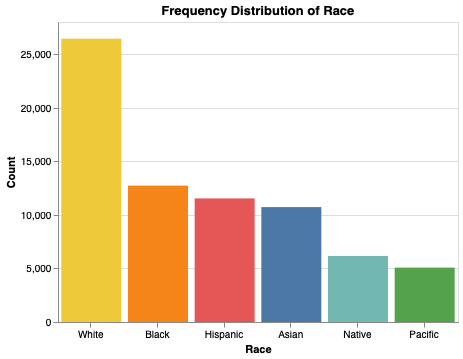

In [20]:
import altair as alt

#Count Poverty Class and convert to DF then rename values
race_count = census_pc_agg['Race'].value_counts()
race_count = race_count.to_frame()
race_count = race_count.reset_index()
race_count = race_count.rename(columns={"index": "Race", "Race": "Count"})
race_count = race_count.replace([1,2,3,4,5,6], ['Hispanic','White','Black','Native','Asian','Pacific'])

#Create Chart
alt.Chart(race_count,title = 'Frequency Distribution of Race').mark_bar().encode(
    x = alt.X("Race",axis = alt.Axis(labelAngle = 0),sort = ['x']),
    y = "Count",
    color = alt.Color("Race",legend = None)).properties(width = 400, height = 300)

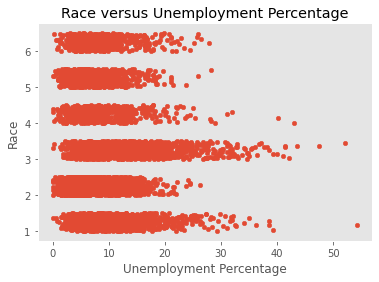

In [ ]:
from matplotlib import pyplot as plt
plt.style.use("ggplot")

census_pc_agg_sample = census_pc_agg.sample(frac = .1)

%matplotlib inline
X1 = census_pc_agg_sample[['Race','Unemployment']].values

plt.scatter(X1[:, 1], X1[:, 0]+np.random.random(X1[:, 1].shape)/2, 
             s=20)
plt.xlabel('Unemployment Percentage'), plt.ylabel('Race')
plt.grid()
plt.title('Race versus Unemployment Percentage')
plt.show()

In [21]:
Work = ''
census_pc_agg.insert(1,'Work',Work)

In [22]:
for i, row in census_pc_agg.iterrows():
    p_t = census_pc_agg.at[i,'Professional']
    p_m = census_pc_agg['Professional'].mean()
    p_d = (p_t - p_m)/p_m
    s_t = census_pc_agg.at[i,'Service']
    s_m = census_pc_agg['Service'].mean()
    s_d = (s_t - s_m)/s_m
    o_t = census_pc_agg.at[i,'Office']
    o_m = census_pc_agg['Office'].mean()
    o_d = (o_t - o_m)/o_m
    c_t = census_pc_agg.at[i,'Construction']
    c_m = census_pc_agg['Construction'].mean()
    c_d = (c_t - c_m)/c_m
    pr_t = census_pc_agg.at[i,'Production']
    pr_m = census_pc_agg['Production'].mean()
    pr_d = (pr_t - pr_m)/pr_m

    max_d = max(p_d, s_d, o_d, c_d, pr_d)
    result = ''

    if max_d == p_d:
      result = 1
    if max_d == s_d:
      result = 2
    if max_d == o_d:
      result = 3
    if max_d == c_d:
      result = 4
    if max_d == pr_d:
      result = 5

    census_pc_agg.at[i,'Work'] = result

del census_pc_agg['Professional']
del census_pc_agg['Service']
del census_pc_agg['Office']
del census_pc_agg['Construction']
del census_pc_agg['Production']
census_pc_agg.head() 

Race Work  IncomePerCap  CitizenPercent  ChildPoverty  Drive  Carpool  \
0    2    4      25713.00           77.20          8.40  90.20     4.80   
1    3    5      18021.00           77.10         40.30  86.30    13.10   
2    6    2      20689.00           78.70         19.70  94.80     2.80   
3    4    5      24125.00           74.70          1.60  86.60     9.10   
4    3    1      27526.00           71.20         17.50  88.00    10.50   

   Transit  Walk  OtherTransp  WorkAtHome  MeanCommute  PrivateWork  \
0     0.00  0.50         2.30        2.10        25.00        77.10   
1     0.00  0.00         0.70        0.00        23.40        77.00   
2     0.00  0.00         0.00        2.50        19.60        64.10   
3     0.00  0.00         2.60        1.60        25.30        75.70   
4     0.00  0.00         0.60        0.90        24.80        67.10   

   PublicWork  SelfEmployed  FamilyWork  EmployedPercent  Unemployment  \
0       18.30          4.60        0.00            48.40          5.40   
1       16.90          6.10        0.00            34.90         13.30   
2       23.60         12.30        0.00            46.30          6.20   
3       21.20          3.10        0.00            40.30         10.80   
4       27.60          5.30        0.00            46.80          4.20   

  PovertyClass  
0            2  
1            4  
2            2  
3            1  
4            2

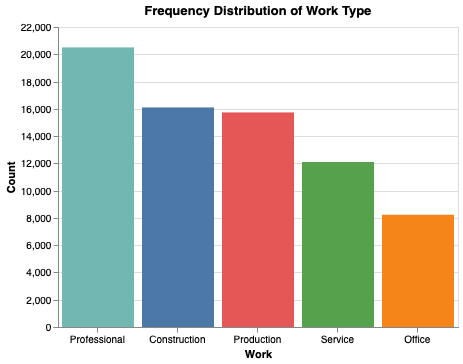

In [23]:
#Count Poverty Class and convert to DF then rename values
work_count = census_pc_agg['Work'].value_counts()
work_count = work_count.to_frame()
work_count = work_count.reset_index()
work_count = work_count.rename(columns={"index": "Work", "Work": "Count"})
work_count = work_count.replace([1,2,3,4,5], ['Professional','Service','Office','Construction','Production'])

#Create Chart
alt.Chart(work_count,title = 'Frequency Distribution of Work Type').mark_bar().encode(
    x = alt.X("Work",axis = alt.Axis(labelAngle = 0),sort = ['x']),
    y = "Count",
    color = alt.Color("Work",legend = None)).properties(width = 400, height = 300)

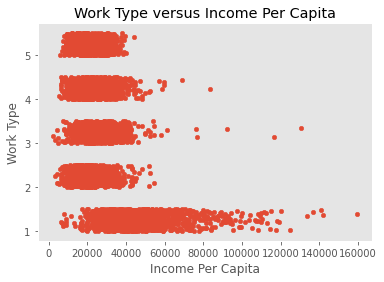

In [ ]:
from matplotlib import pyplot as plt
plt.style.use("ggplot")

census_pc_agg_sample = census_pc_agg.sample(frac = .1)

%matplotlib inline
X1 = census_pc_agg_sample[['Work','IncomePerCap']].values

plt.scatter(X1[:, 1], X1[:, 0]+np.random.random(X1[:, 1].shape)/2, 
             s=20)
plt.xlabel('Income Per Capita'), plt.ylabel('Work Type')
plt.grid()
plt.title('Work Type versus Income Per Capita')
plt.show()

In [24]:
Transportation = ''
census_pc_agg.insert(2,'Transportation',Transportation)

In [25]:
for i, row in census_pc_agg.iterrows():
    d_t = census_pc_agg.at[i,'Drive']
    d_m = census_pc_agg['Drive'].mean()
    d_d = (d_t - d_m)/d_m
    c_t = census_pc_agg.at[i,'Carpool']
    c_m = census_pc_agg['Carpool'].mean()
    c_d = (c_t - c_m)/c_m
    t_t = census_pc_agg.at[i,'Transit']
    t_m = census_pc_agg['Transit'].mean()
    t_d = (t_t - t_m)/t_m
    w_t = census_pc_agg.at[i,'Walk']
    w_m = census_pc_agg['Walk'].mean()
    w_d = (w_t - w_m)/w_m
    ot_t = census_pc_agg.at[i,'OtherTransp']
    ot_m = census_pc_agg['OtherTransp'].mean()
    ot_d = (ot_t - ot_m)/ot_m
    wfh_t = census_pc_agg.at[i,'WorkAtHome']
    wfh_m = census_pc_agg['WorkAtHome'].mean()
    wfh_d = (wfh_t - wfh_m)/wfh_m

    max_d = max(d_d, c_d, t_d, w_d, ot_d, wfh_d)
    result = ''

    if max_d == d_d:
      result = 1
    if max_d == c_d:
      result = 2
    if max_d == t_d:
      result = 3
    if max_d == w_d:
      result = 4
    if max_d == ot_d:
      result = 5
    if max_d == wfh_d:
      result = 6

    census_pc_agg.at[i,'Transportation'] = result

del census_pc_agg['Drive']
del census_pc_agg['Carpool']
del census_pc_agg['Transit']
del census_pc_agg['Walk']
del census_pc_agg['OtherTransp']
del census_pc_agg['WorkAtHome']
census_pc_agg.head() 

Race Work Transportation  IncomePerCap  CitizenPercent  ChildPoverty  \
0    2    4              5      25713.00           77.20          8.40   
1    3    5              2      18021.00           77.10         40.30   
2    6    2              1      20689.00           78.70         19.70   
3    4    5              5      24125.00           74.70          1.60   
4    3    1              1      27526.00           71.20         17.50   

   MeanCommute  PrivateWork  PublicWork  SelfEmployed  FamilyWork  \
0        25.00        77.10       18.30          4.60        0.00   
1        23.40        77.00       16.90          6.10        0.00   
2        19.60        64.10       23.60         12.30        0.00   
3        25.30        75.70       21.20          3.10        0.00   
4        24.80        67.10       27.60          5.30        0.00   

   EmployedPercent  Unemployment PovertyClass  
0            48.40          5.40            2  
1            34.90         13.30            4  
2            46.30          6.20            2  
3            40.30         10.80            1  
4            46.80          4.20            2

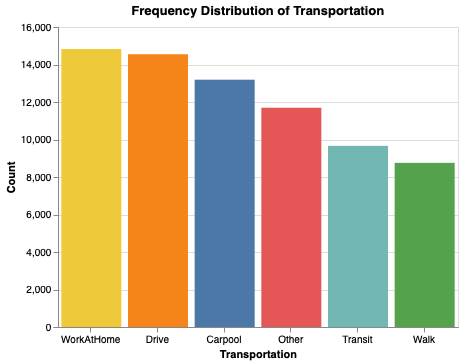

In [26]:
#Count Poverty Class and convert to DF then rename values
transport_count = census_pc_agg['Transportation'].value_counts()
transport_count = transport_count.to_frame()
transport_count = transport_count.reset_index()
transport_count = transport_count.rename(columns={"index": "Transportation", "Transportation": "Count"})
transport_count = transport_count.replace([1,2,3,4,5,6], ['Drive','Carpool','Transit','Walk','Other','WorkAtHome'])

#Create Chart
alt.Chart(transport_count,title = 'Frequency Distribution of Transportation').mark_bar().encode(
    x = alt.X("Transportation",axis = alt.Axis(labelAngle = 0),sort = ['x']),
    y = "Count",
    color = alt.Color("Transportation",legend = None)).properties(width = 400, height = 300)

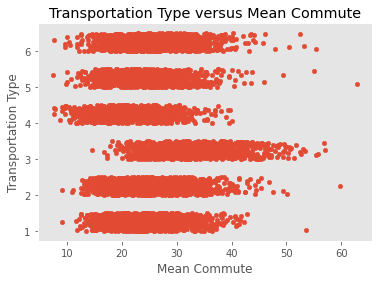

In [ ]:
from matplotlib import pyplot as plt
plt.style.use("ggplot")

census_pc_agg_sample = census_pc_agg.sample(frac = .1)

%matplotlib inline
X1 = census_pc_agg_sample[['Transportation','MeanCommute']].values

plt.scatter(X1[:, 1], X1[:, 0]+np.random.random(X1[:, 1].shape)/2, 
             s=20)
plt.xlabel('Mean Commute'), plt.ylabel('Transportation Type')
plt.grid()
plt.title('Transportation Type versus Mean Commute')
plt.show()

In [27]:
Sector = ''
census_pc_agg.insert(3,'Sector',Sector)

In [28]:
for i, row in census_pc_agg.iterrows():
    pr_t = census_pc_agg.at[i,'PrivateWork']
    pr_m = census_pc_agg['PrivateWork'].mean()
    pr_d = (pr_t - pr_m)/pr_m
    pu_t = census_pc_agg.at[i,'PublicWork']
    pu_m = census_pc_agg['PublicWork'].mean()
    pu_d = (pu_t - pu_m)/pu_m
    se_t = census_pc_agg.at[i,'SelfEmployed']
    se_m = census_pc_agg['SelfEmployed'].mean()
    se_d = (se_t - se_m)/se_m
    fw_t = census_pc_agg.at[i,'FamilyWork']
    fw_m = census_pc_agg['FamilyWork'].mean()
    fw_d = (fw_t - fw_m)/fw_m

    max_d = max(pr_d, pu_d, se_d, fw_d)
    result = ''

    if max_d == pr_d:
      result = 1
    if max_d == pu_d:
      result = 2
    if max_d == se_d:
      result = 3
    if max_d == fw_d:
      result = 4

    census_pc_agg.at[i,'Sector'] = result

del census_pc_agg['PrivateWork']
del census_pc_agg['PublicWork']
del census_pc_agg['SelfEmployed']
del census_pc_agg['FamilyWork']
census_pc.head() 

Hispanic  White  Black  Native  Asian  Pacific  IncomePerCap  \
0      0.90  87.40   7.70    0.30   0.60     0.00      25713.00   
1      0.80  40.40  53.30    0.00   2.30     0.00      18021.00   
2      0.00  74.50  18.60    0.50   1.40     0.30      20689.00   
3     10.50  82.80   3.70    1.60   0.00     0.00      24125.00   
4      0.70  68.50  24.80    0.00   3.80     0.00      27526.00   

   CitizenPercent  ChildPoverty  Professional  Service  Office  Construction  \
0           77.20          8.40         34.70    17.00   21.30         11.90   
1           77.10         40.30         22.30    24.70   21.50          9.40   
2           78.70         19.70         31.40    24.90   22.10          9.20   
3           74.70          1.60         27.00    20.80   27.00          8.70   
4           71.20         17.50         49.60    14.20   18.20          2.10   

   Production  Drive  Carpool  Transit  Walk  OtherTransp  WorkAtHome  \
0       15.20  90.20     4.80     0.00  0.50         2.30        2.10   
1       22.00  86.30    13.10     0.00  0.00         0.70        0.00   
2       12.40  94.80     2.80     0.00  0.00         0.00        2.50   
3       16.40  86.60     9.10     0.00  0.00         2.60        1.60   
4       15.80  88.00    10.50     0.00  0.00         0.60        0.90   

   MeanCommute  PrivateWork  PublicWork  SelfEmployed  FamilyWork  \
0        25.00        77.10       18.30          4.60        0.00   
1        23.40        77.00       16.90          6.10        0.00   
2        19.60        64.10       23.60         12.30        0.00   
3        25.30        75.70       21.20          3.10        0.00   
4        24.80        67.10       27.60          5.30        0.00   

   EmployedPercent  Unemployment PovertyClass  
0            48.40          5.40            2  
1            34.90         13.30            4  
2            46.30          6.20            2  
3            40.30         10.80            1  
4            46.80          4.20            2

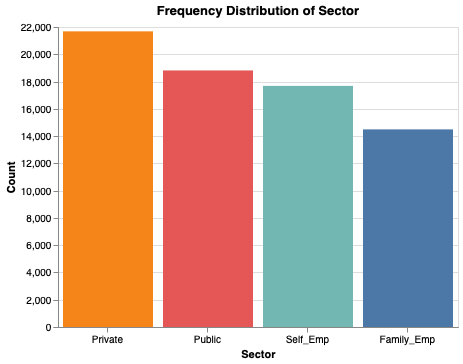

In [29]:
#Count Poverty Class and convert to DF then rename values
sector_count = census_pc_agg['Sector'].value_counts()
sector_count = sector_count.to_frame()
sector_count = sector_count.reset_index()
sector_count = sector_count.rename(columns={"index": "Sector", "Sector": "Count"})
sector_count = sector_count.replace([1,2,3,4], ['Private','Public','Self_Emp','Family_Emp'])

#Create Chart
alt.Chart(sector_count,title = 'Frequency Distribution of Sector').mark_bar().encode(
    x = alt.X("Sector",axis = alt.Axis(labelAngle = 0),sort = ['x']),
    y = "Count",
    color = alt.Color("Sector",legend = None)).properties(width = 400, height = 300)

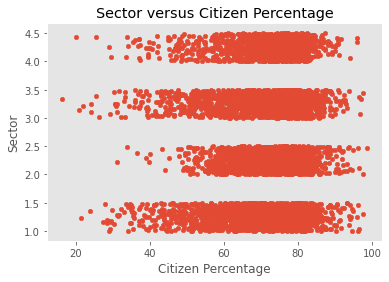

In [ ]:
from matplotlib import pyplot as plt
plt.style.use("ggplot")

census_pc_agg_sample = census_pc_agg.sample(frac = .1)

%matplotlib inline
X1 = census_pc_agg_sample[['Sector','CitizenPercent']].values

plt.scatter(X1[:, 1], X1[:, 0]+np.random.random(X1[:, 1].shape)/2, 
             s=20)
plt.xlabel('Citizen Percentage'), plt.ylabel('Sector')
plt.grid()
plt.title('Sector versus Citizen Percentage')
plt.show()

In [ ]:
census_pc_agg.head()

Race Work Transportation Sector  IncomePerCap  CitizenPercent  ChildPoverty  \
0    2    4              5      2      25713.00           77.20          8.40   
1    3    5              2      2      18021.00           77.10         40.30   
2    6    2              1      3      20689.00           78.70         19.70   
3    4    5              5      2      24125.00           74.70          1.60   
4    3    1              1      2      27526.00           71.20         17.50   

   MeanCommute  EmployedPercent  Unemployment PovertyClass  
0        25.00            48.40          5.40            2  
1        23.40            34.90         13.30            4  
2        19.60            46.30          6.20            2  
3        25.30            40.30         10.80            1  
4        24.80            46.80          4.20            2

#### **3.3.1 New Baseline Classification Performance Using Newly Engineered Features**

In [30]:
%%time
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

if 'PovertyClass' in census_pc:
    y = census_pc_agg['PovertyClass'].values # get the labels we want
    del census_pc_agg['PovertyClass'] # get rid of the class label
    X = census_pc_agg.values # use everything else to predict! 

# Scale the data
ss = StandardScaler()
X = ss.fit_transform(X)

num_cv_iterations = 10
cv = StratifiedKFold(n_splits = num_cv_iterations, shuffle = True, random_state = 13)
clf = RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=25, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, n_estimators=400,
                       n_jobs=None, oob_score=False, random_state=11, verbose=0,
                       warm_start=False)

acc = cross_val_score(clf,X,y,cv=cv)

print ("Average accuracy: ", acc.mean()*100, "+-", acc.std()*100, ", Minimum Accuracy: ", acc.min()*100, ", Maximum Accuracy: ", acc.max()*100)

Average accuracy:  78.8842909408936 +- 0.4202105550241339 , Minimum Accuracy:  78.32668226228154 , Maximum Accuracy:  79.71652676482731
CPU times: user 6min 23s, sys: 2.58 s, total: 6min 26s
Wall time: 6min 27s


Set Up New Clusters

In [31]:
X1_agg = census_pc_agg[['Race', 'Unemployment']]
X2_agg = census_pc_agg[['Work', 'IncomePerCap']]
X3_agg = census_pc_agg[['Transportation', 'MeanCommute']]
X4_agg = census_pc_agg[['Sector', 'CitizenPercent']]

K Means:

In [ ]:
%%time
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
import numpy as np
import pandas as pd

# get the first clustering
cls_race = KMeans(n_clusters=race_optimal_k_clusters, init='k-means++',random_state=1)
cls_race.fit(X1_agg)
newfeature_race = cls_race.labels_ 

# append on the second clustering
cls_work = KMeans(n_clusters=work_optimal_k_clusters, init='k-means++',random_state=1)
cls_work.fit(X2_agg)
newfeature_work = cls_work.labels_ 

# append on the third clustering
cls_transport = KMeans(n_clusters=transport_optimal_k_clusters, init='k-means++',random_state=1)
cls_transport.fit(X3_agg)
newfeature_transport = cls_transport.labels_ 

# append on the fourth clustering
cls_sector = KMeans(n_clusters=sector_optimal_k_clusters, init='k-means++',random_state=1)
cls_sector.fit(X4_agg)
newfeature_sector = cls_sector.labels_ 

y = census_pc_agg['PovertyClass']
X = census_pc_agg[['ChildPoverty']]
X = np.column_stack((X,pd.get_dummies(newfeature_race),pd.get_dummies(newfeature_work), pd.get_dummies(newfeature_transport), pd.get_dummies(newfeature_sector)))

num_cv_iterations = 10
cv = StratifiedKFold(n_splits = num_cv_iterations, shuffle = True, random_state = 13)
clf = RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=25, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, n_estimators=400,
                       n_jobs=None, oob_score=False, random_state=11, verbose=0,
                       warm_start=False)

acc = cross_val_score(clf,X,y=y,cv=cv)

print ("K Means: Average accuracy = ", acc.mean()*100, "+-", acc.std()*100, ", Minimum Accuracy: ", acc.min()*100, ", Maximum Accuracy: ", acc.max()*100)

K Means: Average accuracy =  72.78281397219463 +- 0.5258330314685931 , Minimum Accuracy:  71.79028484931884 , Maximum Accuracy:  73.66175863492501
CPU times: user 6min 17s, sys: 1min 8s, total: 7min 26s
Wall time: 7min 22s


DBSCAN:

In [48]:
%%time
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
import numpy as np
import pandas as pd

# get the first clustering
cls_race = DBSCAN(eps=race_optimal_DB_EPS, min_samples=race_optimal_DB_MPTS)
cls_race.fit(X1_agg)
newfeature_race = cls_race.labels_

# append on the second clustering
cls_work = DBSCAN(eps=work_optimal_DB_EPS, min_samples=work_optimal_DB_MPTS)
cls_work.fit(X2_agg)
newfeature_work = cls_work.labels_

# append on the third clustering
cls_transport = DBSCAN(eps=transport_optimal_DB_EPS, min_samples=transport_optimal_DB_MPTS)
cls_transport.fit(X3_agg)
newfeature_transport = cls_transport.labels_ 

# append on the fourth clustering
cls_sector = DBSCAN(eps=sector_optimal_DB_EPS, min_samples=sector_optimal_DB_MPTS)
cls_sector.fit(X4_agg)
newfeature_sector = cls_sector.labels_

y = census_pc_agg['PovertyClass']
X = census_pc_agg[['ChildPoverty']]
X = np.column_stack((X,pd.get_dummies(newfeature_race),pd.get_dummies(newfeature_work), pd.get_dummies(newfeature_transport), pd.get_dummies(newfeature_sector)))

num_cv_iterations = 10
cv = StratifiedKFold(n_splits = num_cv_iterations, shuffle = True, random_state = 13)
clf = RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=25, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, n_estimators=400,
                       n_jobs=None, oob_score=False, random_state=11, verbose=0,
                       warm_start=False)

acc = cross_val_score(clf,X,y=y,cv=cv)

print ("DBSCAN: Average accuracy = ", acc.mean()*100, "+-", acc.std()*100, ", Minimum Accuracy: ", acc.min()*100, ", Maximum Accuracy: ", acc.max()*100)

DBSCAN: Average accuracy =  72.56401932000263 +- 0.4166957741157302 , Minimum Accuracy:  71.87284986927204 , Maximum Accuracy:  73.49662859501858
CPU times: user 19min 35s, sys: 1min 27s, total: 21min 2s
Wall time: 21min 46s


We still get the same low accuracy when compared to our baseline.

### **3.4 Modeling and Evaluation 4: Summarize Results and Ramifications**

When we analyzed the ramifications between the Kmeans and DBscan methodologies, we noticed that the Kmeans gave more discrete clusters than the DBScan. This is depicted well when we compare the two cluster analysis for [Kmeans](https://colab.research.google.com/drive/15t7c0AjF8NDef-bjrqW8s7yl9B0asjOY#scrollTo=ur3_0uv_ZLp-&line=1&uniqifier=1) and [DBscan](https://colab.research.google.com/drive/15t7c0AjF8NDef-bjrqW8s7yl9B0asjOY#scrollTo=G9llYhnCTx6J&line=17&uniqifier=1) in section [3.3](https://colab.research.google.com/drive/15t7c0AjF8NDef-bjrqW8s7yl9B0asjOY#scrollTo=GMpeHV6qexTU). The DBscan took slightly longer in computing time because it was choosing more parameters, but these additional parameters could potentially better results if we were able to continue analysis and clustering combinations. Lastly, what determined our optimal parameters is the accuracy of the model when that cluster was combined with the Random Forest classifier. For training our parameters in Kmeans we looped through different values of the number of clusters 3 through 15. For DBscan we looped through different values of the EPS and minimum samples. This gave us the optimal parameters and the grouping are listed below for reference:
```
race_optimal_k_clusters = 6
race_optimal_DB_EPS = 1
race_optimal_DB_MPTS = 75
```
```
work_optimal_k_clusters = 8
work_optimal_DB_EPS = 5
work_optimal_DB_MPTS = 25
```
```
transport_optimal_k_clusters = 8
transport_optimal_DB_EPS = 5
transport_optimal_DB_MPTS = 25
```
```
sector_optimal_k_clusters = 6
sector_optimal_DB_EPS = 5
sector_optimal_DB_MPTS = 75
```
One of the cons to the clustering methods is, given the lack of accuracy improvement from clustering, the ramifications of leveraging these clustering methods could be wasteful use of time and computing efforts by teams that would be better spent on other classification methods. On the other hand, in favor of clustering, it did allow us insight into how some of the variables can be clustered together to create better separation and visualizations of poverty class. Most of the groupings we surfaced are displayed in section [3.3](https://colab.research.google.com/drive/15t7c0AjF8NDef-bjrqW8s7yl9B0asjOY#scrollTo=GMpeHV6qexTU).
 
We have a fairly large data set and could try seemingly infinite options for clustering. With the clusters we chose, we did not add value as expected. But given how large the data set is, it is still possible that there are combinations of data variables that will create good separation and allow clustering methods to be more useful classification models. In an ideal situation we would expect to continue to refine the cluster groups to see if we can produce improvements on the clustering models to help with deployment over time.
 
Overall, we attempted clustering some variables we see having strong relationships and to use those clusters to boost accuracy. Our baseline model accuracy of a random forest model averaged 79.877% with an expected range of .45%. Over multiple iterations of clustering we could not generate accuracies at a higher level than our baseline. We used multiple cluster analysis to build a wide variety of clusters with our baseline data. After selecting an optimal clustering pattern we again built these clusters using DBscan and Kmeans clustering techniques. However we did not find these final models using clusters to improve accuracy on predicting poverty class at all.
 
We attempted to use these clusterings to generate separation between clusters that could appropriately help classify poverty levels. We did not find the clusters we built to be particularly helpful for separation enough to properly assist prediction. Therefore, when deployment is discussed we will not leverage clustering as our primary classification method.

## **4. Deployment**

Clustering can be an essential technique for reducing dimensionality in a way that allows models to make more accurate predictions. In addition, clustering data can provide insight into natural groupings we expect mirror reality through data collected. In both instances, we found our clustering approaches lacked the ability to produce a better model or provide insight on natural groupings. After modeling with multiple cluster approaches we found our clustering models averaged about 79% in accuracy when predicting Poverty Class, this was slightly lower than our best random forest model generated Lab 2 at 80% accuracy. Clustering could be used as a classification of the poverty class but we feel it would not be the most helpful out of our models. Our current classifications of poverty are clear and simple for the average person to understand and expect clustering of poverty to obfuscate that clarity. We attempted to find high separation in classes between poverty classes using such additional variables as: ethnicity, job function, employment, and income, overall those clusters were not helpful for our approach.

For companies and organizations that may want to leverage our clustering method in addition to other modeling techniques they will see about a top accuracy of 80%.

Poverty identification would be useful for different government relief programs that assist families who are in extreme or high poverty. Programs, as they are today, are lacking in budgeting and finance management. A successful clustering model could help different government agencies plan and budget locally in order to assure those relief packages would be available to the most in need areas of the United States. With our clustering models reaching 79% accuracy we think they, used in conjunction with our random forest model could potentially be very useful. With a high degree of accuracy government organizations looking to direct relief dollars can find value in understanding which locations are in highest need by poverty status. 
 
A combined model deployment (clustering and non-clustered random forest model) can also offer use to varied types of businesses. First, nonprofits that specialize in job training may find a blue collar and high poverty location a high priority as blue collar jobs are more likely to be outsourced or automated while high poverty may indicate this shift is already happening and workers in the area may be underemployed. On the other hand, a specialty grocery store with high cost organic food for sale may find success not just in low poverty locations, but also find their product is higher valued in a location with white collar majority jobs. Additionally, this model could help the U.S. government welfare agency plan and budget by geographical region in order to assure those relief packages would be available to the right areas of the United States. Non-profit agencies could also benefit from being able to classify regional areas of the United States. They could plan and effectively execute: food relief, child poverty relief, school scholarship, and other resources to help lift those families up in their continued efforts to help.
 
We can measure the use of these models on various standards dependent on the user. A non profit offering job retraining in our hypothetical high poverty blue class locations can measure the effectiveness of their model on efficiency of use of resources to bring potential clients over into their job retraining program. If that non-profit was able to focus efforts in locations with more need, they would find that they could serve more people without spending as many resources informing and enticing them to come to the program. If a specialty grocery store may spend less on research on new locations by deploying these models and find more regular returns on investments of locations they open in low poverty white collar locations. 

The cluster classification model and random forest models together can be built into the regular approach these organizations have in researching and reaching out into new territories. Deploying the models would require an in depth discussion with the organization itself and its goals and needs in understanding the socioeconomic dynamics at play in locations they themselves have no experience in. If the organizations themselves can offer data that is compatible with the model that could be another step to rebuild this model to better serve their needs. The model, being built on census data, can be updated and tuned with each new census data update. But intermittent updates from other trusted sources updating our attributes can offer fresh perspective and real time tuning for our organizations. 

Overall, deployment of our classification and clustering models to predict Poverty Class are flexible based on public regular data and offer important insights to various organizations that are looking for insight on poverty levels and job makeup of locations of interest. These models are not everlasting as they only reflect reality as it is and when people move and change, so too should these models update and grow.

## **5. Exceptional Work**

### **5.1 Feature Engineering**

In section [3.3 Modeling Evaluation 3: Visualize Results](https://colab.research.google.com/drive/15t7c0AjF8NDef-bjrqW8s7yl9B0asjOY#scrollTo=RiDeq2zpujzJ) we performed additional feature engineering we would like to be considered for exceptional work.

### **5.2 Multiple Cluster Analysis**

We use four different clustered feature subsets in section [3.1.2](https://colab.research.google.com/drive/15t7c0AjF8NDef-bjrqW8s7yl9B0asjOY#scrollTo=g8OPrGJC4_S4&line=1&uniqifier=1), one cluster per variable groups that we identified in section two (race, work type, transportation type, and sector type) clustered with another variable that we identified the separation and trending in our scatter plot visualization section. We would like these efforts to be considered for exceptional work.

### **5.3 Python Visualizations**
We took extra effort to dissect and depict our variables in a fashion that is easily digestible for our reader in section [2.2 Data Understanding 2: Visualizing Important Attributes](https://colab.research.google.com/drive/15t7c0AjF8NDef-bjrqW8s7yl9B0asjOY#scrollTo=Z4n0W2CRegSk&line=3&uniqifier=1). We would like to put forth these efforts in to be considered for exceptional work. 

### **5.4 Hyper Parameter Tuning**
We created 2 split and fold variations for the hyper paramter training for our Kmeans and DBscan. Then we ran the final models on a 10 fold with combinations and baselines. We would like to put this efforts towards exceptional work consideration.

### **5.5 Cluster Evaluation**
To further evaluate our cluster analysis we combined each of our four clusters together and ran our Random Forest Classifier in section [3.2](https://colab.research.google.com/drive/15t7c0AjF8NDef-bjrqW8s7yl9B0asjOY#scrollTo=5-o4xO2Peujl). We use the optimal k_clusters for each cluster in the combined K-Means algorithm and the optimal EPS/Min-Points for each cluster in the DBSCAN algorithm. We would like to have this considered for exceptional work.